In [1]:
# Import libraries, process data, define training and tests sets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from ucimlrepo import fetch_ucirepo 
import time

from sklearn.utils import shuffle

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
  
# fetch dataset 
statlog_vehicle_silhouettes = fetch_ucirepo(id=149) 
  
# data (as pandas dataframes) 
X_df = statlog_vehicle_silhouettes.data.features 
y_df = statlog_vehicle_silhouettes.data.targets 
  
# metadata 
print(statlog_vehicle_silhouettes.metadata) 
  
# variable information 
print(statlog_vehicle_silhouettes.variables) 

print(X_df)
print(y_df)

{'uci_id': 149, 'name': 'Statlog (Vehicle Silhouettes)', 'repository_url': 'https://archive.ics.uci.edu/dataset/149/statlog+vehicle+silhouettes', 'data_url': 'https://archive.ics.uci.edu/static/public/149/data.csv', 'abstract': '3D objects within a 2D image by application of an ensemble of shape feature extractors to the 2D silhouettes of the objects.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 946, 'num_features': 18, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': None, 'last_updated': 'Fri Feb 16 2024', 'dataset_doi': '10.24432/C5HG6N', 'creators': ['Pete Mowforth', 'Barry Shepherd'], 'intro_paper': {'title': 'Vehicle Recognition Using Rule Based Methods', 'authors': 'J. Siebert', 'published_in': 'Turing Institute', 'year': 1987, 'url': 'https://www.semanticscholar.org/paper/Vehicle-Recognition-

In [2]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   COMPACTNESS                       845 non-null    float64
 1   CIRCULARITY                       846 non-null    int64  
 2   DISTANCE CIRCULARITY              846 non-null    int64  
 3   RADIUS RATIO                      846 non-null    int64  
 4   PR.AXIS ASPECT RATIO              846 non-null    int64  
 5   MAX.LENGTH ASPECT RATIO           846 non-null    int64  
 6   SCATTER RATIO                     846 non-null    int64  
 7   ELONGATEDNESS                     846 non-null    int64  
 8   PR.AXIS RECTANGULARITY            846 non-null    int64  
 9   MAX.LENGTH RECTANGULARITY         846 non-null    int64  
 10  SCALED VARIANCE ALONG MAJOR AXIS  846 non-null    int64  
 11  SCALED VARIANCE ALONG MINOR AXIS  846 non-null    int64  
 12  SCALED R

In [3]:
y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   846 non-null    object
dtypes: object(1)
memory usage: 6.7+ KB


In [4]:
label_encoder = LabelEncoder()
y_df['class'] = label_encoder.fit_transform(y_df['class'])
y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   class   846 non-null    int32
dtypes: int32(1)
memory usage: 3.4 KB


C:\Users\koutr\AppData\Local\Temp\ipykernel_21292\1672925393.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_df['class'] = label_encoder.fit_transform(y_df['class'])


In [5]:
print('Classes')
print(y_df.groupby(['class'])['class'].count())

Classes
class
0      1
1    217
2    212
3    217
4    199
Name: class, dtype: int64


In [6]:
[217/(217+212+217+199), 212/(217+212+217+199), 217/(217+212+217+199), 199/(217+212+217+199)]

[0.25680473372781065,
 0.25088757396449707,
 0.25680473372781065,
 0.23550295857988165]

In [7]:
data_df = pd.concat([X_df, y_df], axis=1)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   COMPACTNESS                       845 non-null    float64
 1   CIRCULARITY                       846 non-null    int64  
 2   DISTANCE CIRCULARITY              846 non-null    int64  
 3   RADIUS RATIO                      846 non-null    int64  
 4   PR.AXIS ASPECT RATIO              846 non-null    int64  
 5   MAX.LENGTH ASPECT RATIO           846 non-null    int64  
 6   SCATTER RATIO                     846 non-null    int64  
 7   ELONGATEDNESS                     846 non-null    int64  
 8   PR.AXIS RECTANGULARITY            846 non-null    int64  
 9   MAX.LENGTH RECTANGULARITY         846 non-null    int64  
 10  SCALED VARIANCE ALONG MAJOR AXIS  846 non-null    int64  
 11  SCALED VARIANCE ALONG MINOR AXIS  846 non-null    int64  
 12  SCALED R

In [8]:
# count the duplicated cases
data_df.duplicated().sum()

0

In [9]:
nans = data_df.isna()
print('Missing values')
print(nans.sum(axis=0))

data_df.dropna(inplace=True)
data_df = data_df[data_df['class'] != 0]

data_df.reset_index(drop=True,inplace=True)

print(data_df.groupby(['class'])['class'].count())

nans = data_df.isna()
print('Missing values')
print(nans.sum(axis=0))

Missing values
COMPACTNESS                         1
CIRCULARITY                         0
DISTANCE CIRCULARITY                0
RADIUS RATIO                        0
PR.AXIS ASPECT RATIO                0
MAX.LENGTH ASPECT RATIO             0
SCATTER RATIO                       0
ELONGATEDNESS                       0
PR.AXIS RECTANGULARITY              0
MAX.LENGTH RECTANGULARITY           0
SCALED VARIANCE ALONG MAJOR AXIS    0
SCALED VARIANCE ALONG MINOR AXIS    0
SCALED RADIUS OF GYRATION           0
SKEWNESS ABOUT MAJOR AXIS           0
SKEWNESS ABOUT MINOR AXIS           0
KURTOSIS ABOUT MINOR AXIS           0
KURTOSIS ABOUT MAJOR AXIS           0
HOLLOWS RATIO                       0
class                               0
dtype: int64
class
1    217
2    212
3    217
4    199
Name: class, dtype: int64
Missing values
COMPACTNESS                         0
CIRCULARITY                         0
DISTANCE CIRCULARITY                0
RADIUS RATIO                        0
PR.AXIS ASPECT 

In [10]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845 entries, 0 to 844
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   COMPACTNESS                       845 non-null    float64
 1   CIRCULARITY                       845 non-null    int64  
 2   DISTANCE CIRCULARITY              845 non-null    int64  
 3   RADIUS RATIO                      845 non-null    int64  
 4   PR.AXIS ASPECT RATIO              845 non-null    int64  
 5   MAX.LENGTH ASPECT RATIO           845 non-null    int64  
 6   SCATTER RATIO                     845 non-null    int64  
 7   ELONGATEDNESS                     845 non-null    int64  
 8   PR.AXIS RECTANGULARITY            845 non-null    int64  
 9   MAX.LENGTH RECTANGULARITY         845 non-null    int64  
 10  SCALED VARIANCE ALONG MAJOR AXIS  845 non-null    int64  
 11  SCALED VARIANCE ALONG MINOR AXIS  845 non-null    int64  
 12  SCALED R

<Axes: >

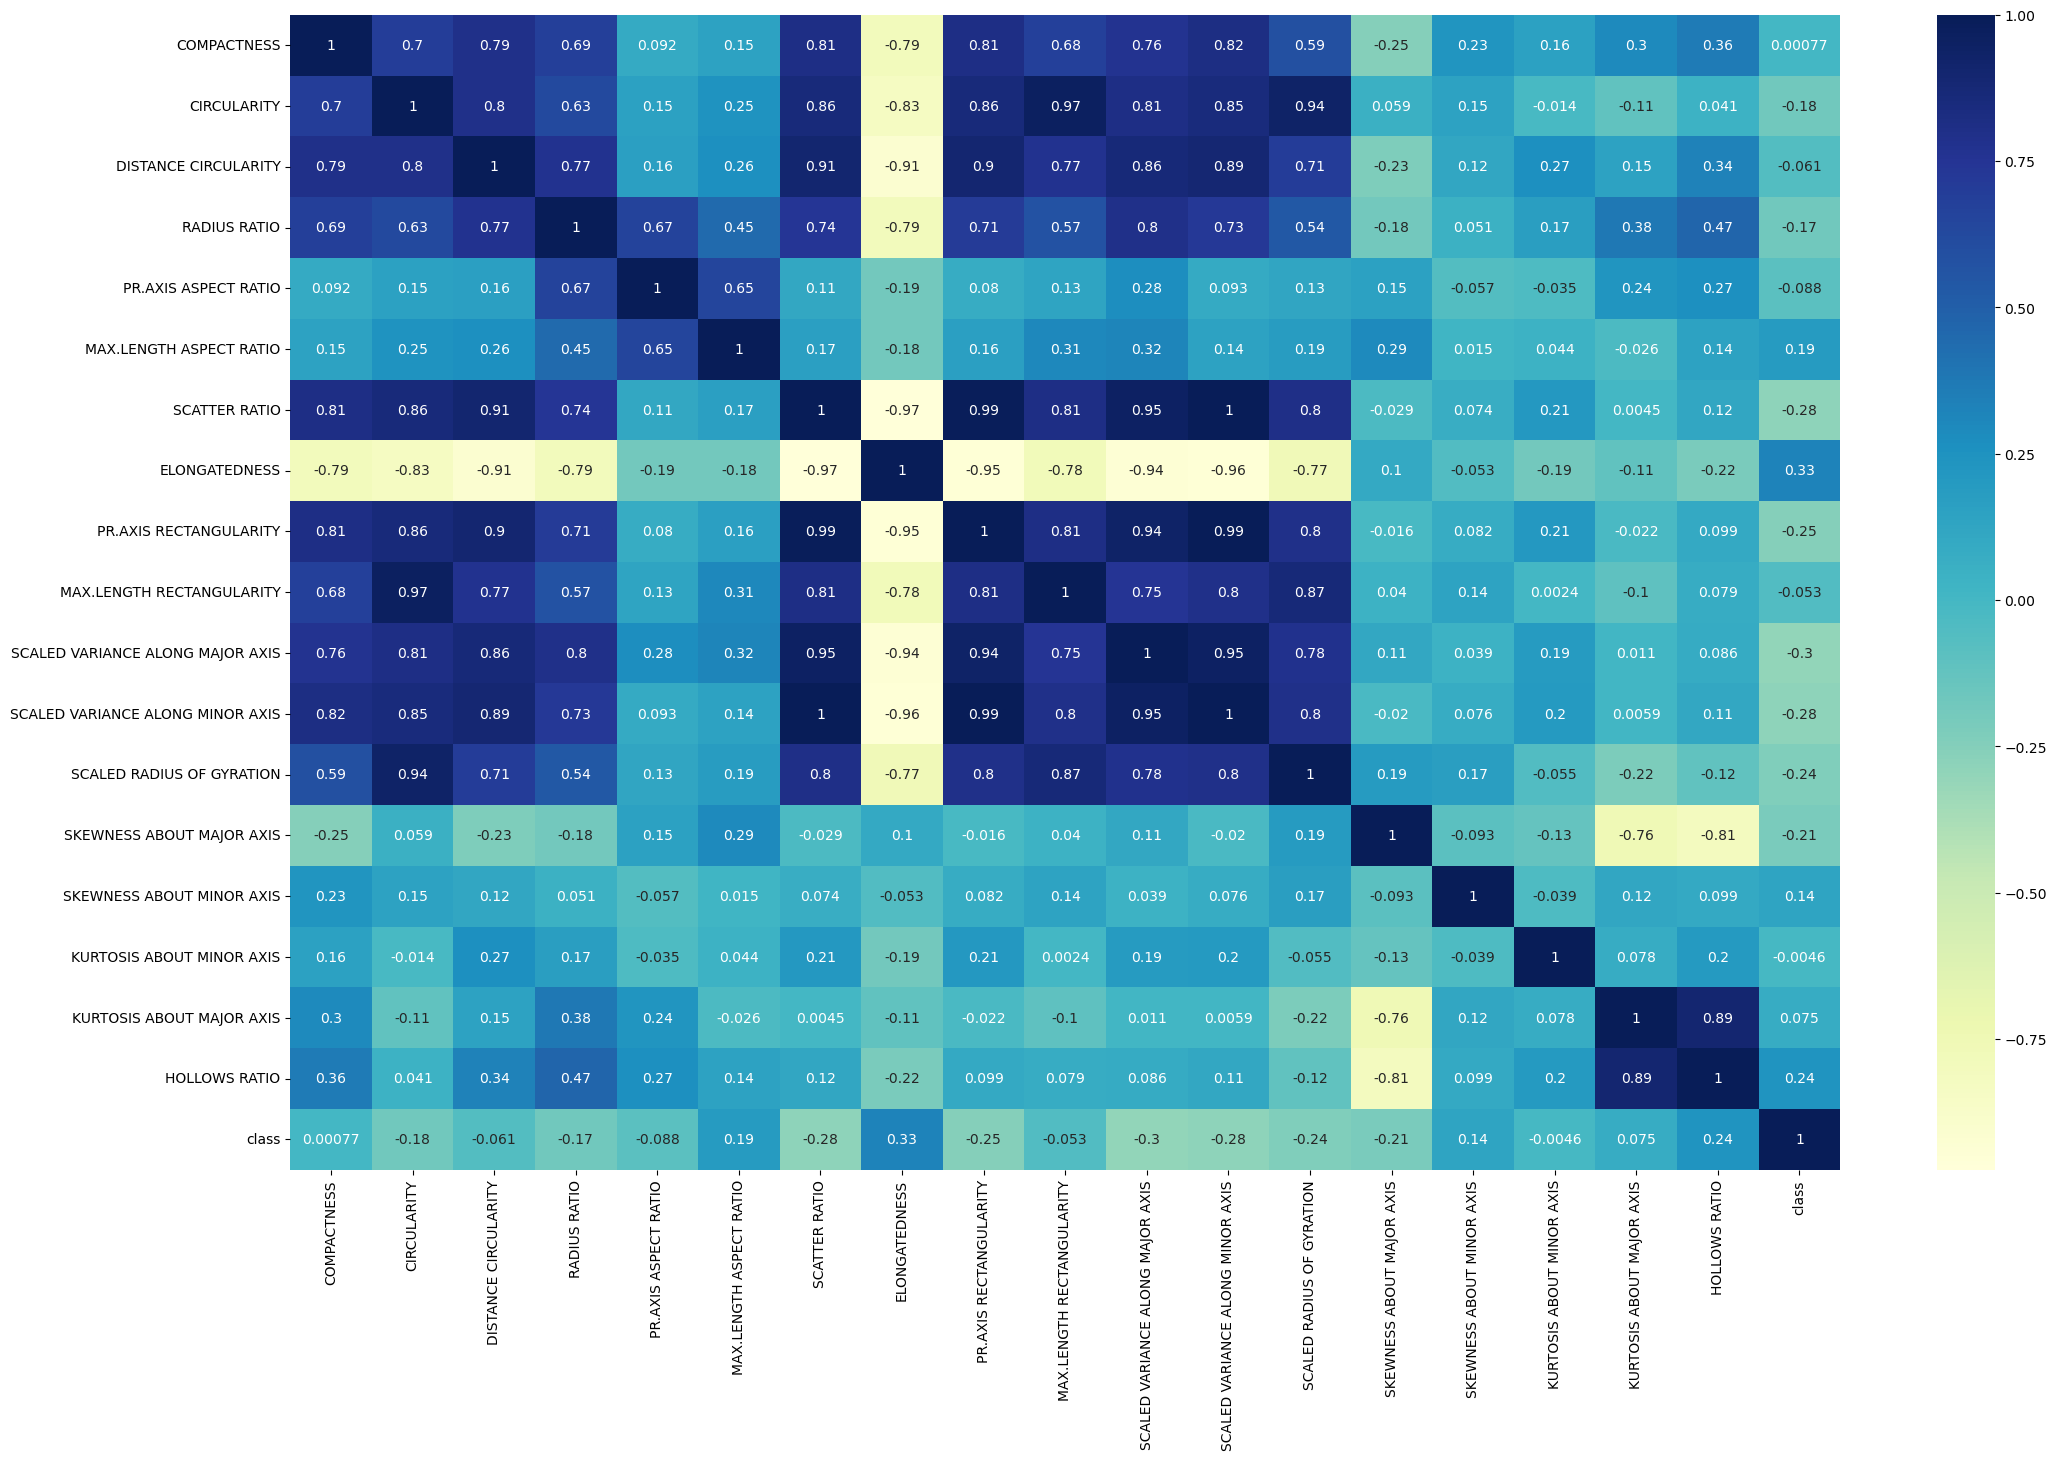

In [11]:
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(data_df.corr(),annot=True,cmap="YlGnBu" , ax=ax)

In [12]:
# Feature df
X_df = data_df.copy()
X_df.drop(['class'], axis=1, inplace=True)

X = X_df.values
y = data_df['class'].values

seed = 903946366

# Shuffle data and then split into the training and the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state = seed, 
                                                    stratify = y)


In [13]:
X_df

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
0,95.0,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197
1,91.0,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199
2,104.0,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196
3,93.0,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207
4,85.0,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,93.0,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195
841,89.0,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197
842,106.0,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201
843,86.0,36,78,146,58,7,135,50,18,124,155,270,148,66,0,25,190,195


In [14]:
X.shape

(845, 18)

DT train accuracy: 0.7800338409475466
DT test accuracy: 0.6850393700787402
DT train f1 score: 0.7714510118595039
DT test f1 score: 0.6758675578826023
DT train roc_auc: 0.935697654511949
DT test roc_auc: 0.8852874726684623


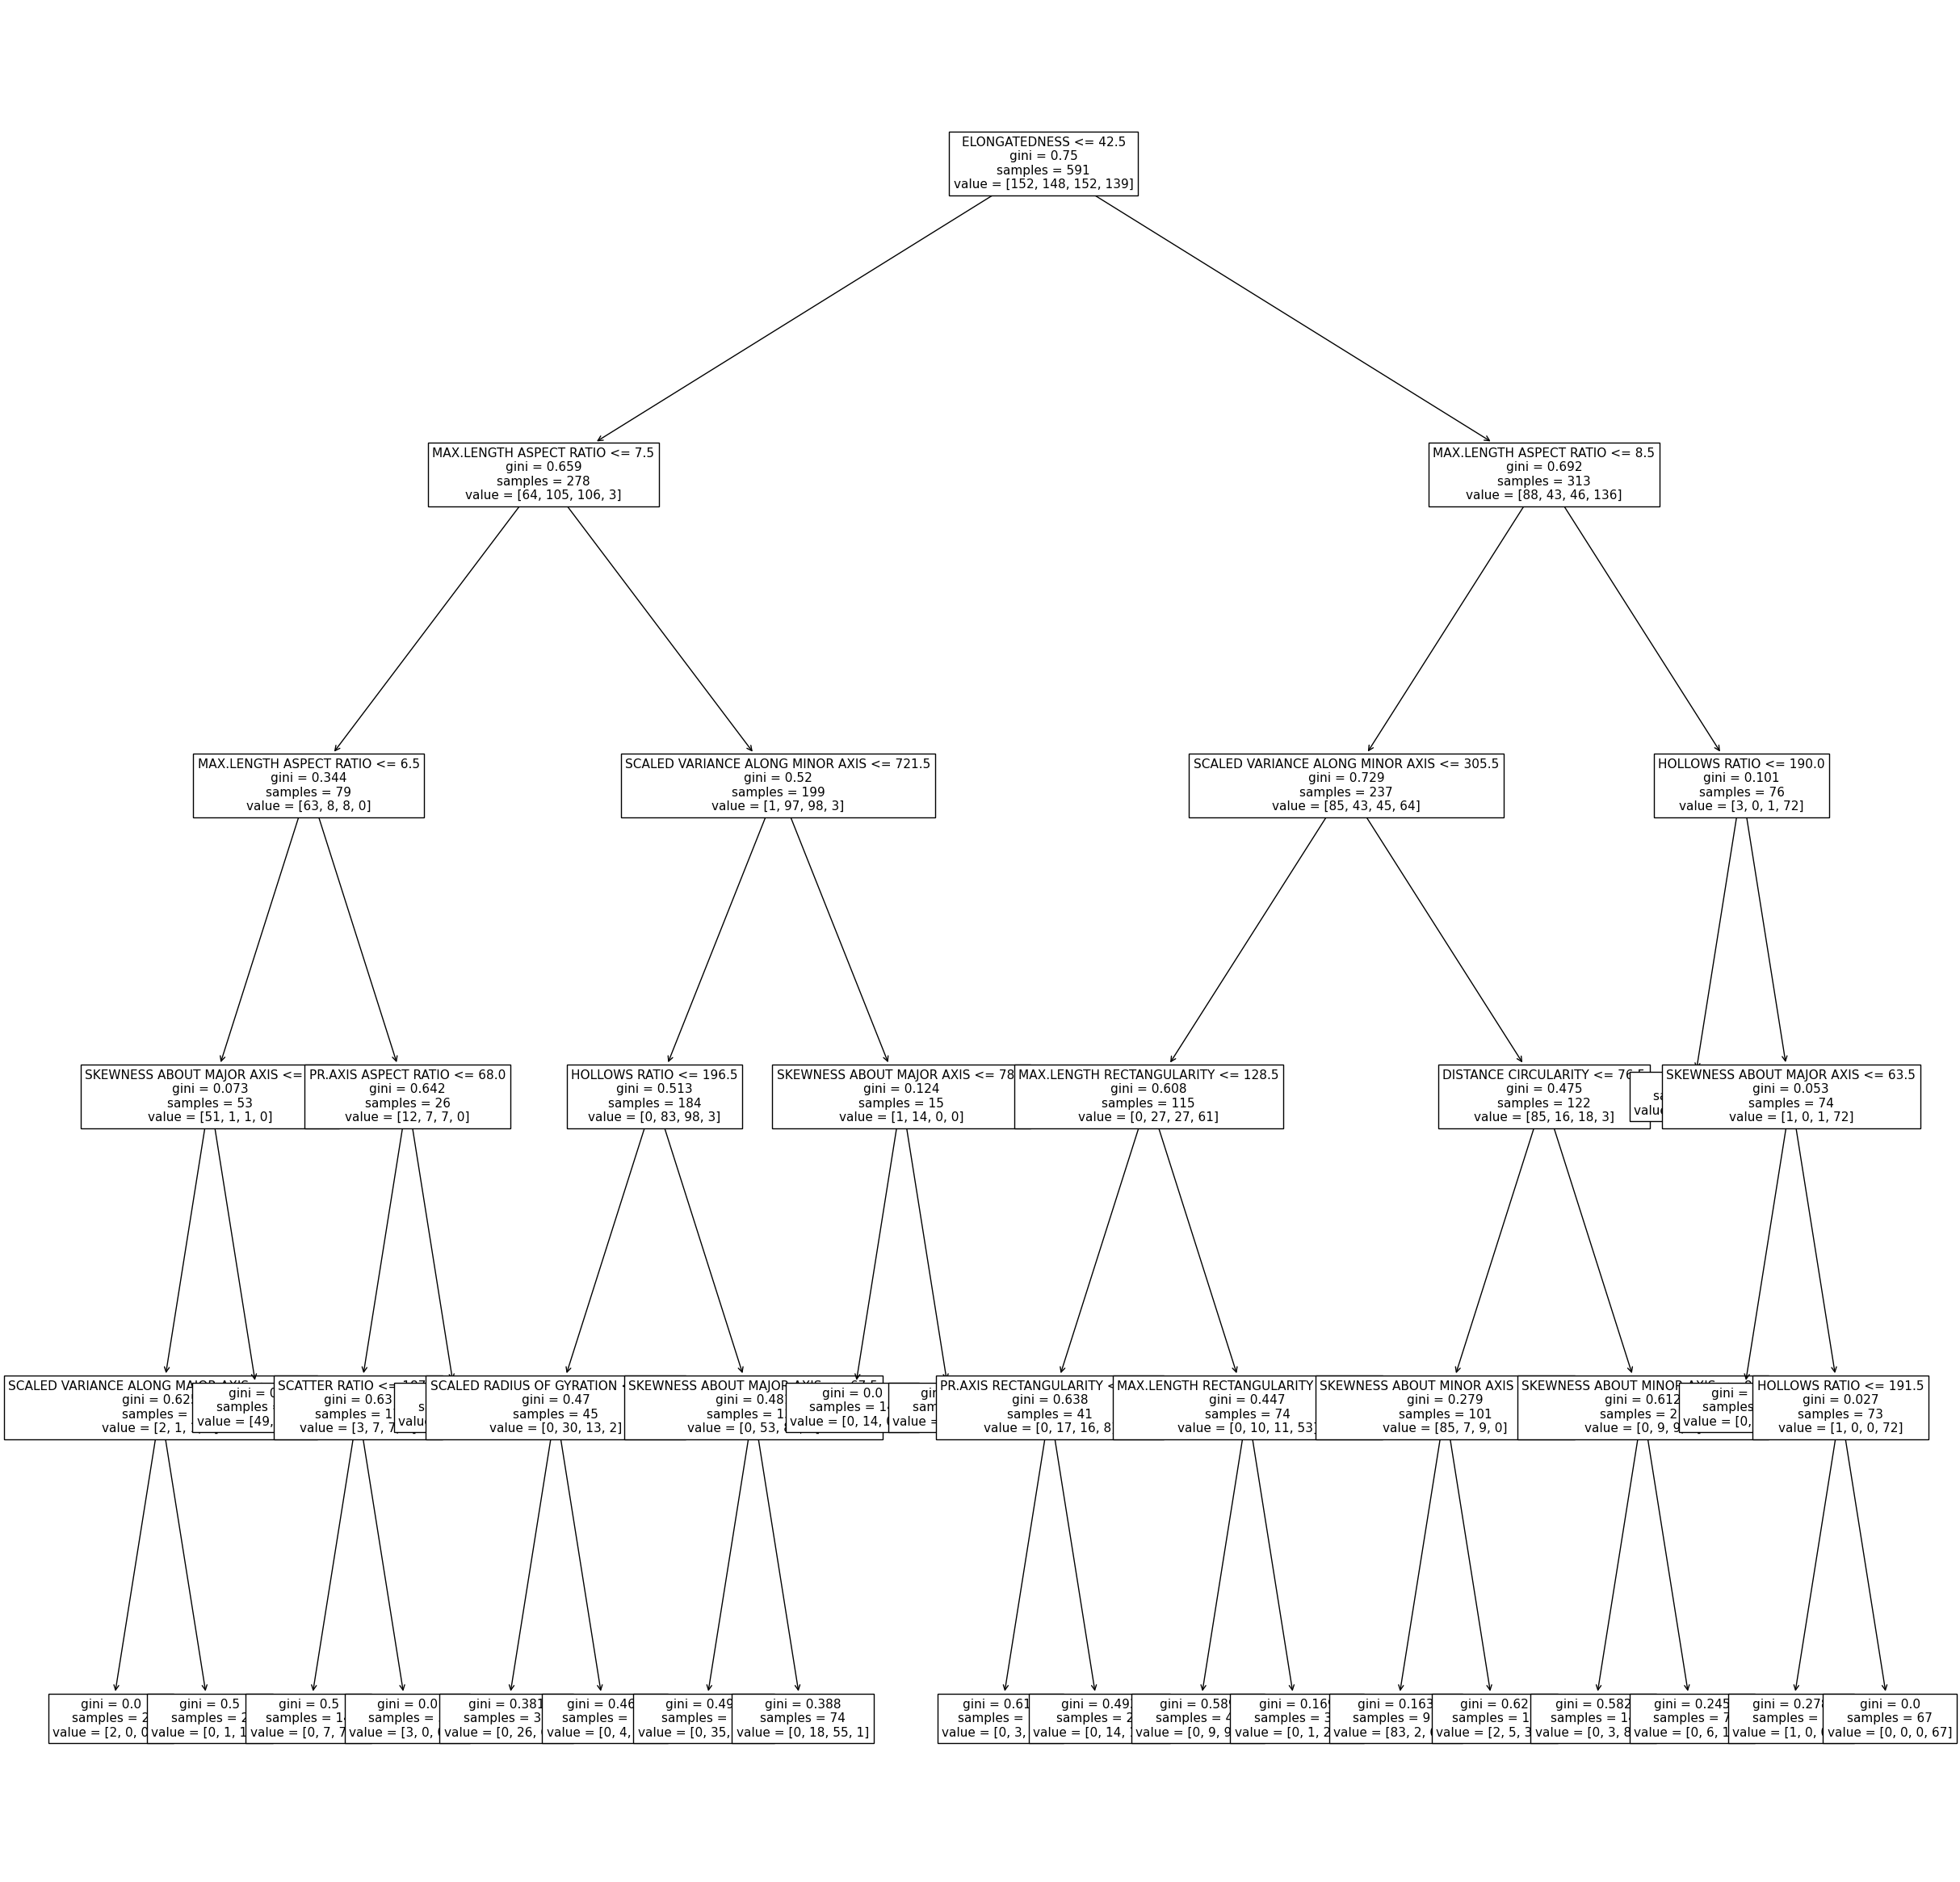

In [15]:
# Decision tree classifier
max_depth = 5
clf = DecisionTreeClassifier(max_depth=max_depth, random_state=seed)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

dt_train_acc = accuracy_score(y_train, y_pred_train)
dt_test_acc = accuracy_score(y_test, y_pred_test)

dt_train_f1 = f1_score(y_train, y_pred_train, average='macro')
dt_test_f1 = f1_score(y_test, y_pred_test, average='macro')

dt_train_roc_auc = roc_auc_score(y_train, clf.predict_proba(X_train), average='macro', multi_class='ovr')
dt_test_roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test), average='macro', multi_class='ovr')

print(f'DT train accuracy: {dt_train_acc}')    
print(f'DT test accuracy: {dt_test_acc}')

print(f'DT train f1 score: {dt_train_f1}')    
print(f'DT test f1 score: {dt_test_f1}') 

print(f'DT train roc_auc: {dt_train_roc_auc}')    
print(f'DT test roc_auc: {dt_test_roc_auc}') 

fig = plt.figure(figsize=(30,30))
plot_tree(clf, feature_names = list(X_df.columns), fontsize=11)
plt.show()
fig.savefig(f'DT-max_depth-{max_depth}.png')
plt.close(fig)

In [16]:
# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

1. KNN

In [19]:
# KNN
# ===============================
# 3) K nearest neighbors learner
# ===============================

# A) Validation curves for k using uniform weights

train_acc_m = []
train_acc_std = []
test_acc_m = []
test_acc_std = []

train_roc_m = []
train_roc_std = []
test_roc_m = []
test_roc_std = []

k_list = list(range(1,41,1))

for k in k_list:
    clf = KNeighborsClassifier(n_neighbors=k, weights='uniform', p=2) 
    scores = cross_validate(clf, X_train, y_train, cv=5, scoring = ['accuracy','roc_auc_ovr'], return_train_score=True, 
                            n_jobs=8)
    
    # train and test accuracy
    train_acc_m.append(np.mean(scores['train_accuracy']))
    train_acc_std.append(np.std(scores['train_accuracy']))
    test_acc_m.append(np.mean(scores['test_accuracy']))  
    test_acc_std.append(np.std(scores['test_accuracy']))
                        
    # train and test roc auc
    train_roc_m.append(np.mean(scores['train_roc_auc_ovr']))
    train_roc_std.append(np.std(scores['train_roc_auc_ovr']))                                        
    test_roc_m.append(np.mean(scores['test_roc_auc_ovr']))
    test_roc_std.append(np.std(scores['test_roc_auc_ovr']))

print('KNN cross-validation for #neighbors using uniform weights and Euclidean distance')
print(f'Maximum accuracy score: {max(test_acc_m)} at k={k_list[test_acc_m.index(max(test_acc_m))]}')
print(f'Maximum roc_auc score: {max(test_roc_m)} at k={k_list[test_roc_m.index(max(test_roc_m))]}')

train_acc_m_knn1 = np.asarray(train_acc_m)
train_acc_std_knn1 = np.asarray(train_acc_std)
test_acc_m_knn1 = np.asarray(test_acc_m)
test_acc_std_knn1 = np.asarray(test_acc_std) 

train_roc_m_knn1 = np.asarray(train_roc_m)
train_roc_std_knn1 = np.asarray(train_roc_std)
test_roc_m_knn1 = np.asarray(test_roc_m)
test_roc_std_knn1 = np.asarray(test_roc_std)

KNN cross-validation for #neighbors using uniform weights and Euclidean distance
Maximum accuracy score: 0.6887480415895172 at k=3
Maximum roc_auc score: 0.8968145062118463 at k=11


In [20]:
# KNN
# ===============================
# 3) K nearest neighbors learner
# ===============================

# B) Validation curves for k using weighted distance

train_acc_m = []
train_acc_std = []
test_acc_m = []
test_acc_std = []

train_roc_m = []
train_roc_std = []
test_roc_m = []
test_roc_std = []

k_list = list(range(1,41,1))

for k in k_list:
    clf = KNeighborsClassifier(n_neighbors=k, weights='distance', p=2) 
    scores = cross_validate(clf, X_train, y_train, cv=5, scoring = ['accuracy','roc_auc_ovr'], return_train_score=True, 
                            n_jobs=8)
    
    # train and test accuracy
    train_acc_m.append(np.mean(scores['train_accuracy']))
    train_acc_std.append(np.std(scores['train_accuracy']))
    test_acc_m.append(np.mean(scores['test_accuracy']))  
    test_acc_std.append(np.std(scores['test_accuracy']))
                        
    # train and test roc auc
    train_roc_m.append(np.mean(scores['train_roc_auc_ovr']))
    train_roc_std.append(np.std(scores['train_roc_auc_ovr']))                                        
    test_roc_m.append(np.mean(scores['test_roc_auc_ovr']))
    test_roc_std.append(np.std(scores['test_roc_auc_ovr']))

print('KNN cross-validation for #neighbors using weights by the Euclidean distance')
print(f'Maximum accuracy score: {max(test_acc_m)} at k={k_list[test_acc_m.index(max(test_acc_m))]}')
print(f'Maximum roc_auc score: {max(test_roc_m)} at k={k_list[test_roc_m.index(max(test_roc_m))]}')

train_acc_m_knn2 = np.asarray(train_acc_m)
train_acc_std_knn2 = np.asarray(train_acc_std)
test_acc_m_knn2 = np.asarray(test_acc_m)
test_acc_std_knn2 = np.asarray(test_acc_std) 

train_roc_m_knn2 = np.asarray(train_roc_m)
train_roc_std_knn2 = np.asarray(train_roc_std)
test_roc_m_knn2 = np.asarray(test_roc_m)
test_roc_std_knn2 = np.asarray(test_roc_std)

KNN cross-validation for #neighbors using weights by the Euclidean distance
Maximum accuracy score: 0.6971229169633956 at k=4
Maximum roc_auc score: 0.90013607316256 at k=15


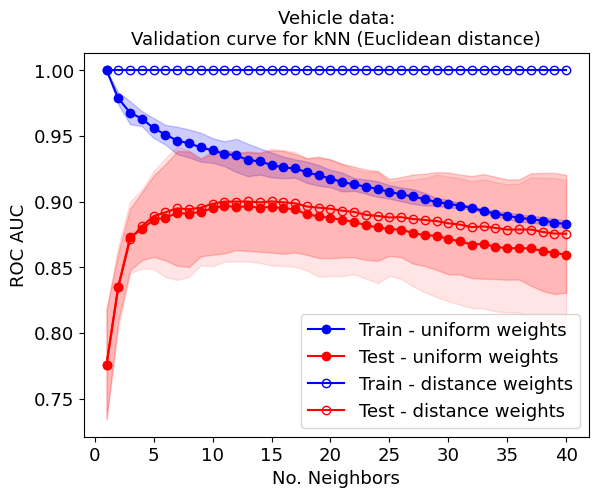

In [21]:
fontsize = 13

# roc_auc
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.79, 0.80])
# Uniform weights
ax.plot(k_list, train_roc_m_knn1, 'o-', color='b', label='Train - uniform weights')
ax.fill_between(k_list, train_roc_m_knn1 - 2*train_roc_std_knn1, train_roc_m_knn1 + 2*train_roc_std_knn1, 
                alpha=0.2, color="b")

ax.plot(k_list, test_roc_m_knn1, 'o-', color='r', label='Test - uniform weights')
ax.fill_between(k_list, test_roc_m_knn1 - 2*test_roc_std_knn1, test_roc_m_knn1 + 2*test_roc_std_knn1, 
                alpha=0.1, color="r")

# Distance weights
ax.plot(k_list, train_roc_m_knn2, 'o-', color='b', markerfacecolor='none', label='Train - distance weights')
ax.fill_between(k_list, train_roc_m_knn2 - 2*train_roc_std_knn2, train_roc_m_knn2 + 2*train_roc_std_knn2, 
                alpha=0.1, color="b")

ax.plot(k_list, test_roc_m_knn2, 'o-', color='r', markerfacecolor='none', label='Test - distance weights')
ax.fill_between(k_list, test_roc_m_knn2 - 2*test_roc_std_knn2, test_roc_m_knn2 + 2*test_roc_std_knn2, 
                alpha=0.2, color="r")

ax.legend(fontsize=fontsize, loc="best")
ax.tick_params(labelsize=fontsize)
ax.set_title('Vehicle data:\nValidation curve for kNN (Euclidean distance)', fontsize=fontsize) 
ax.set_xlabel('No. Neighbors', fontsize=fontsize) 
ax.set_ylabel('ROC AUC', fontsize=fontsize) 
plt.show()
fig.savefig('knn-roc_auc-neighbors-euclidean.png')
plt.close(fig)

In [22]:
# KNN
# ===============================
# 3) K nearest neighbors learner
# ===============================

# C) Validation curves for k using uniform weights and the Manhattan distance

train_acc_m = []
train_acc_std = []
test_acc_m = []
test_acc_std = []

train_roc_m = []
train_roc_std = []
test_roc_m = []
test_roc_std = []

k_list = list(range(1,41,1))

for k in k_list:
    clf = KNeighborsClassifier(n_neighbors=k, weights='uniform', p=1) 
    scores = cross_validate(clf, X_train, y_train, cv=5, scoring = ['accuracy','roc_auc_ovr'], return_train_score=True, 
                            n_jobs=8)
    
    # train and test accuracy
    train_acc_m.append(np.mean(scores['train_accuracy']))
    train_acc_std.append(np.std(scores['train_accuracy']))
    test_acc_m.append(np.mean(scores['test_accuracy']))  
    test_acc_std.append(np.std(scores['test_accuracy']))
                        
    # train and test roc auc
    train_roc_m.append(np.mean(scores['train_roc_auc_ovr']))
    train_roc_std.append(np.std(scores['train_roc_auc_ovr']))                                        
    test_roc_m.append(np.mean(scores['test_roc_auc_ovr']))
    test_roc_std.append(np.std(scores['test_roc_auc_ovr']))

print('KNN cross-validation for #neighbors using uniform weights and the Manhattan distance')
print(f'Maximum accuracy score: {max(test_acc_m)} at k={k_list[test_acc_m.index(max(test_acc_m))]}')
print(f'Maximum roc_auc score: {max(test_roc_m)} at k={k_list[test_roc_m.index(max(test_roc_m))]}')

train_acc_m_knn3 = np.asarray(train_acc_m)
train_acc_std_knn3 = np.asarray(train_acc_std)
test_acc_m_knn3 = np.asarray(test_acc_m)
test_acc_std_knn3 = np.asarray(test_acc_std) 

train_roc_m_knn3 = np.asarray(train_roc_m)
train_roc_std_knn3 = np.asarray(train_roc_std)
test_roc_m_knn3 = np.asarray(test_roc_m)
test_roc_std_knn3 = np.asarray(test_roc_std)

KNN cross-validation for #neighbors using uniform weights and the Manhattan distance
Maximum accuracy score: 0.7038740920096852 at k=8
Maximum roc_auc score: 0.9027181663848978 at k=12


In [23]:
# KNN
# ===============================
# 3) K nearest neighbors learner
# ===============================

# D) Validation curves for k using weights by the Manhattan distance

train_acc_m = []
train_acc_std = []
test_acc_m = []
test_acc_std = []

train_roc_m = []
train_roc_std = []
test_roc_m = []
test_roc_std = []

k_list = list(range(1,41,1))

for k in k_list:
    clf = KNeighborsClassifier(n_neighbors=k, weights='distance', p=1) 
    scores = cross_validate(clf, X_train, y_train, cv=5, scoring = ['accuracy','roc_auc_ovr'], return_train_score=True, 
                            n_jobs=8)
    
    # train and test accuracy
    train_acc_m.append(np.mean(scores['train_accuracy']))
    train_acc_std.append(np.std(scores['train_accuracy']))
    test_acc_m.append(np.mean(scores['test_accuracy']))  
    test_acc_std.append(np.std(scores['test_accuracy']))
                        
    # train and test roc auc
    train_roc_m.append(np.mean(scores['train_roc_auc_ovr']))
    train_roc_std.append(np.std(scores['train_roc_auc_ovr']))                                        
    test_roc_m.append(np.mean(scores['test_roc_auc_ovr']))
    test_roc_std.append(np.std(scores['test_roc_auc_ovr']))

print('KNN cross-validation for #neighbors using weights by Manhattan')
print(f'Maximum accuracy score: {max(test_acc_m)} at k={k_list[test_acc_m.index(max(test_acc_m))]}')
print(f'Maximum roc_auc score: {max(test_roc_m)} at k={k_list[test_roc_m.index(max(test_roc_m))]}')

train_acc_m_knn4 = np.asarray(train_acc_m)
train_acc_std_knn4 = np.asarray(train_acc_std)
test_acc_m_knn4 = np.asarray(test_acc_m)
test_acc_std_knn4 = np.asarray(test_acc_std) 

train_roc_m_knn4 = np.asarray(train_roc_m)
train_roc_std_knn4 = np.asarray(train_roc_std)
test_roc_m_knn4 = np.asarray(test_roc_m)
test_roc_std_knn4 = np.asarray(test_roc_std)

KNN cross-validation for #neighbors using weights by Manhattan
Maximum accuracy score: 0.6971229169633956 at k=8
Maximum roc_auc score: 0.9030686363973277 at k=12


In [198]:
test_acc_m_knn4

array([0.66835209, 0.66835209, 0.67518872, 0.68363481, 0.69037174,
       0.67849309, 0.69205241, 0.69712292, 0.69710867, 0.69032901,
       0.69028628, 0.69538527, 0.69031477, 0.68864834, 0.69367611,
       0.68017376, 0.6751175 , 0.68357784, 0.6751175 , 0.68360632,
       0.6751175 , 0.68020225, 0.68531548, 0.67346532, 0.68188292,
       0.67685515, 0.6751175 , 0.67175616, 0.670047  , 0.67850734,
       0.67342259, 0.67006124, 0.66833784, 0.67175616, 0.67001852,
       0.66838057, 0.66160091, 0.66158667, 0.67171343, 0.65653041])

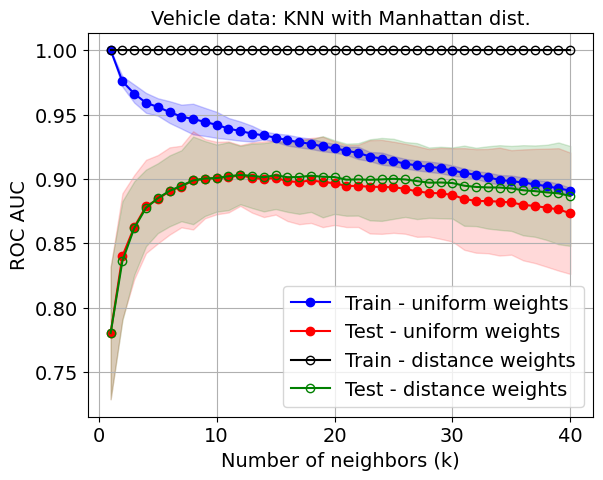

In [211]:
fontsize = 14

# roc_auc
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.79, 0.80])
# Uniform weights
ax.plot(k_list, train_roc_m_knn3, 'o-', color='b', label='Train - uniform weights')
ax.fill_between(k_list, train_roc_m_knn3 - 2*train_roc_std_knn3, train_roc_m_knn3 + 2*train_roc_std_knn3, 
                alpha=0.2, color="b")

ax.plot(k_list, test_roc_m_knn3, 'o-', color='r', label='Test - uniform weights')
ax.fill_between(k_list, test_roc_m_knn3 - 2*test_roc_std_knn3, test_roc_m_knn3 + 2*test_roc_std_knn3, 
                alpha=0.15, color="r")

# Distance weights
ax.plot(k_list, train_roc_m_knn4, 'o-', color='k', markerfacecolor='none', label='Train - distance weights')
ax.fill_between(k_list, train_roc_m_knn4 - 2*train_roc_std_knn4, train_roc_m_knn4 + 2*train_roc_std_knn4, 
                alpha=0.1, color="k")

ax.plot(k_list, test_roc_m_knn4, 'o-', color='g', markerfacecolor='none', label='Test - distance weights')
ax.fill_between(k_list, test_roc_m_knn4 - 2*test_roc_std_knn4, test_roc_m_knn4 + 2*test_roc_std_knn4, 
                alpha=0.15, color="g")

ax.legend(fontsize=fontsize, loc="best")
ax.tick_params(labelsize=fontsize)
ax.set_title('Vehicle data: KNN with Manhattan dist.', fontsize=fontsize) 
ax.set_xlabel('Number of neighbors (k)', fontsize=fontsize) 
ax.set_ylabel('ROC AUC', fontsize=fontsize) 
plt.grid(True)
plt.show()
fig.savefig('knn-roc_auc-neighbors-manhattan.png')
plt.close(fig)

2. SVM

In [25]:
# ===============================
# 2) SVM learner
# ===============================

# A) Validation curves for the kernel type

dmax = 8

poly_list = []
for d in range(2, dmax+1):
    poly_list.append('poly'+str(d))
    
kernel_list = ['linear'] + poly_list + ['rbf', 'sigmoid']
    
train_acc_m = []
train_acc_std = []
test_acc_m = []
test_acc_std = []

train_roc_m = []
train_roc_std = []
test_roc_m = []
test_roc_std = []
    

for kernel in kernel_list:
    print(f'SVM cross validation with {kernel} kernel')
    if kernel[0:4] == 'poly':
        clf = svm.SVC(kernel='poly', gamma='scale', probability=True, degree = int(kernel[-1]), random_state=seed) # default gamma
    else:
        clf = svm.SVC(kernel=kernel, gamma='scale', probability=True, random_state=seed) # default gamma

    scores = cross_validate(clf, X_train, y_train, cv=5, scoring = ['accuracy','roc_auc_ovr'], return_train_score=True,
                            n_jobs=8)
    
    # train and test accuracy
    train_acc_m.append(np.mean(scores['train_accuracy']))
    train_acc_std.append(np.std(scores['train_accuracy']))
    test_acc_m.append(np.mean(scores['test_accuracy']))  
    test_acc_std.append(np.std(scores['test_accuracy']))
                        
    # train and test roc auc
    train_roc_m.append(np.mean(scores['train_roc_auc_ovr']))
    train_roc_std.append(np.std(scores['train_roc_auc_ovr']))                                        
    test_roc_m.append(np.mean(scores['test_roc_auc_ovr']))
    test_roc_std.append(np.std(scores['test_roc_auc_ovr']))
    
print('SVM cross-validation')
print(f'Maximum accuracy score: {max(test_acc_m)} at kernel={kernel_list[test_acc_m.index(max(test_acc_m))]}')
print(f'Maximum roc_auc score: {max(test_roc_m)} at kernel={kernel_list[test_roc_m.index(max(test_roc_m))]}')
    
train_acc_m_svm = np.asarray(train_acc_m)
train_acc_std_svm = np.asarray(train_acc_std)
test_acc_m_svm = np.asarray(test_acc_m)
test_acc_std_svm = np.asarray(test_acc_std) 

train_roc_m_svm = np.asarray(train_roc_m)
train_roc_std_svm = np.asarray(train_roc_std)
test_roc_m_svm = np.asarray(test_roc_m)
test_roc_std_svm = np.asarray(test_roc_std)

SVM cross validation with linear kernel
SVM cross validation with poly2 kernel
SVM cross validation with poly3 kernel
SVM cross validation with poly4 kernel
SVM cross validation with poly5 kernel
SVM cross validation with poly6 kernel
SVM cross validation with poly7 kernel
SVM cross validation with poly8 kernel
SVM cross validation with rbf kernel
SVM cross validation with sigmoid kernel
SVM cross-validation
Maximum accuracy score: 0.773322888477425 at kernel=linear
Maximum roc_auc score: 0.9405110492406425 at kernel=linear


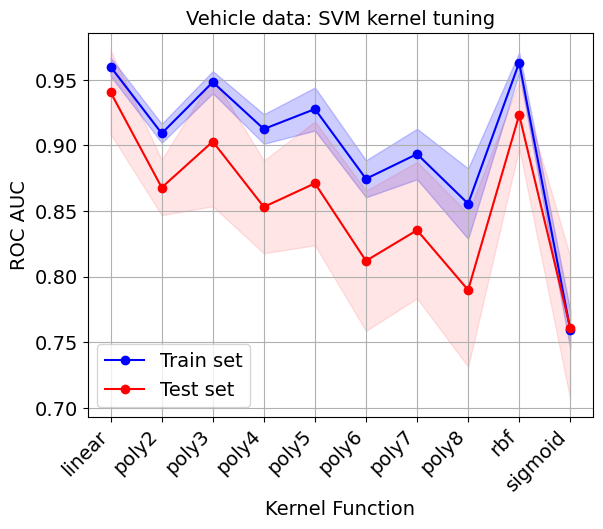

In [213]:
fontsize = 14

# roc_auc
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.79, 0.80])
# svn
ax.plot(kernel_list, train_roc_m_svm, 'o-', color='b', label='Train set')
ax.fill_between(kernel_list, train_roc_m_svm - 2*train_roc_std_svm, train_roc_m_svm + 2*train_roc_std_svm, 
                alpha=0.2, color="b")

ax.plot(kernel_list, test_roc_m_svm, 'o-', color='r', label='Test set')
ax.fill_between(kernel_list, test_roc_m_svm - 2*test_roc_std_svm, test_roc_m_svm + 2*test_roc_std_svm, 
                alpha=0.1, color="r")

ax.legend(fontsize=fontsize, loc="best")
ax.tick_params(labelsize=fontsize)
ax.set_title('Vehicle data: SVM kernel tuning', fontsize=fontsize) 
ax.set_xlabel('Kernel Function', fontsize=fontsize) 
ax.set_ylabel('ROC AUC', fontsize=fontsize) 
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()
fig.savefig('svm-roc_auc-kernel.png')
plt.close(fig)

In [48]:
# -------------------------------
# Validation curve for the regularization parameter with a rbf kernel

C_list = [1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 5e-1, 1.0, 5.0, 10.0, 20, 50, 100.0, 500, 1000.0, 5000.0, 10000.0]
C_list = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0, 10.0, 100.0, 1000.0]

kernel = 'rbf'

train_acc_m = []
train_acc_std = []
test_acc_m = []
test_acc_std = []

train_roc_m = []
train_roc_std = []
test_roc_m = []
test_roc_std = []

for C in C_list:
    clf = svm.SVC(kernel=kernel, gamma='scale', C=C, probability=True, random_state=seed)
    scores = cross_validate(clf, X_train, y_train, cv=5, scoring = ['accuracy', 'roc_auc_ovr'], return_train_score=True)
    
    # train and test accuracy
    train_acc_m.append(np.mean(scores['train_accuracy']))
    train_acc_std.append(np.std(scores['train_accuracy']))
    test_acc_m.append(np.mean(scores['test_accuracy']))  
    test_acc_std.append(np.std(scores['test_accuracy']))
                        
    # train and test roc auc
    train_roc_m.append(np.mean(scores['train_roc_auc_ovr']))
    train_roc_std.append(np.std(scores['train_roc_auc_ovr']))                                        
    test_roc_m.append(np.mean(scores['test_roc_auc_ovr']))
    test_roc_std.append(np.std(scores['test_roc_auc_ovr']))

print('SVM rbf: regularization parameter')
print(f'Maximum accuracy score: {max(test_acc_m)} at C={C_list[test_acc_m.index(max(test_acc_m))]}')
print(f'Maximum validation score: {max(test_roc_m)} at C={C_list[test_roc_m.index(max(test_roc_m))]}')    

train_acc_m_svm1 = np.asarray(train_acc_m)
train_acc_std_svm1 = np.asarray(train_acc_std)
test_acc_m_svm1 = np.asarray(test_acc_m)
test_acc_std_svm1 = np.asarray(test_acc_std) 

train_roc_m_svm1 = np.asarray(train_roc_m)
train_roc_std_svm1 = np.asarray(train_roc_std)
test_roc_m_svm1 = np.asarray(test_roc_m)
test_roc_std_svm1 = np.asarray(test_roc_std)

kernel = 'linear'

train_acc_m = []
train_acc_std = []
test_acc_m = []
test_acc_std = []

train_roc_m = []
train_roc_std = []
test_roc_m = []
test_roc_std = []

for C in C_list:
    clf = svm.SVC(kernel=kernel, gamma='scale', C=C, probability=True, random_state=seed)
    scores = cross_validate(clf, X_train, y_train, cv=5, scoring = ['accuracy', 'roc_auc_ovr'], return_train_score=True)
    
    # train and test accuracy
    train_acc_m.append(np.mean(scores['train_accuracy']))
    train_acc_std.append(np.std(scores['train_accuracy']))
    test_acc_m.append(np.mean(scores['test_accuracy']))  
    test_acc_std.append(np.std(scores['test_accuracy']))
                        
    # train and test roc auc
    train_roc_m.append(np.mean(scores['train_roc_auc_ovr']))
    train_roc_std.append(np.std(scores['train_roc_auc_ovr']))                                        
    test_roc_m.append(np.mean(scores['test_roc_auc_ovr']))
    test_roc_std.append(np.std(scores['test_roc_auc_ovr']))

print('SVM linear: regularization parameter')
print(f'Maximum accuracy score: {max(test_acc_m)} at C={C_list[test_acc_m.index(max(test_acc_m))]}')
print(f'Maximum validation score: {max(test_roc_m)} at C={C_list[test_roc_m.index(max(test_roc_m))]}')    

train_acc_m_svm2 = np.asarray(train_acc_m)
train_acc_std_svm2 = np.asarray(train_acc_std)
test_acc_m_svm2 = np.asarray(test_acc_m)
test_acc_std_svm2 = np.asarray(test_acc_std) 

train_roc_m_svm2 = np.asarray(train_roc_m)
train_roc_std_svm2 = np.asarray(train_roc_std)
test_roc_m_svm2 = np.asarray(test_roc_m)
test_roc_std_svm2 = np.asarray(test_roc_std)



SVM rbf: regularization parameter
Maximum accuracy score: 0.8173052271756159 at C=100.0
Maximum validation score: 0.9518921306400138 at C=10.0
SVM linear: regularization parameter
Maximum accuracy score: 0.7834923800028487 at C=10.0
Maximum validation score: 0.9434140137885493 at C=10.0


In [50]:
test_acc_m_svm1

array([0.37907705, 0.37907705, 0.37907705, 0.37907705, 0.37907705,
       0.59564165, 0.7479134 , 0.80713574, 0.81730523, 0.80546931])

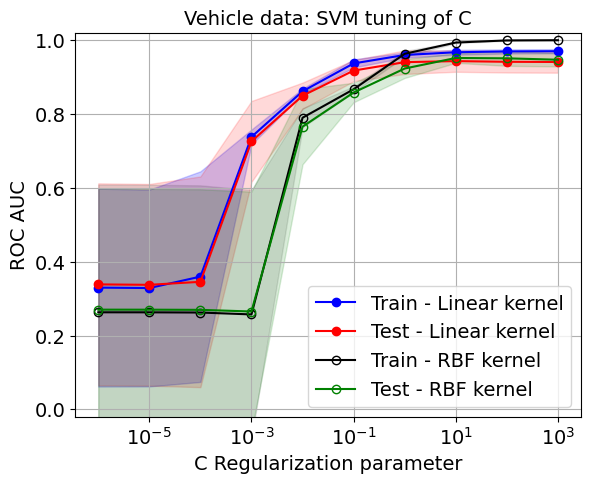

In [215]:
fontsize = 14

# roc_auc
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.79, 0.80])
# Linear kernel
ax.plot(C_list, train_roc_m_svm2, 'o-', color='b', label='Train - Linear kernel')
ax.fill_between(C_list, train_roc_m_svm2 - 2*train_roc_std_svm2, train_roc_m_svm2 + 2*train_roc_std_svm2, 
                alpha=0.2, color="b")

ax.plot(C_list, test_roc_m_svm2, 'o-', color='r', label='Test - Linear kernel')
ax.fill_between(C_list, test_roc_m_svm2 - 2*test_roc_std_svm2, test_roc_m_svm2 + 2*test_roc_std_svm2, 
                alpha=0.15, color="r")

# RBF kernel
ax.plot(C_list, train_roc_m_svm1, 'o-', color='k', markerfacecolor='none', label='Train - RBF kernel')
ax.fill_between(C_list, train_roc_m_svm1 - 2*train_roc_std_svm1, train_roc_m_svm1 + 2*train_roc_std_svm1, 
                alpha=0.1, color="k")

ax.plot(C_list, test_roc_m_svm1, 'o-', color='g', markerfacecolor='none', label='Test - RBF kernel')
ax.fill_between(C_list, test_roc_m_svm1 - 2*test_roc_std_svm1, test_roc_m_svm1 + 2*test_roc_std_svm1, 
                alpha=0.15, color="g")

ax.set_xscale("log", base=10)
ax.legend(fontsize=fontsize, loc="lower right")
ax.tick_params(labelsize=fontsize)
ax.set_title('Vehicle data: SVM tuning of C', fontsize=fontsize) 
ax.set_xlabel('C Regularization parameter', fontsize=fontsize) 
ax.set_ylabel('ROC AUC', fontsize=fontsize)
ax.set_ylim(-0.02, 1.02)
#ax.set_yticks(list(range(0,22,2)))
plt.grid(True)
plt.show()
fig.savefig('svm-roc_auc-C.png')
plt.close(fig)

3. Neural Network learner

logistic
MLP with 1 hidden layers
MLP with 1 hidden layers cross validation for number of nodes per hidden layer
Maximum roc_auc score: 0.9396128994139765 at 6 nodes
Maximum accuracy score: 0.8054693063666145 at 8 nodes
MLP with 2 hidden layers
MLP with 2 hidden layers cross validation for number of nodes per hidden layer
Maximum roc_auc score: 0.9254530019563946 at 14 nodes
Maximum accuracy score: 0.7817832217632815 at 16 nodes


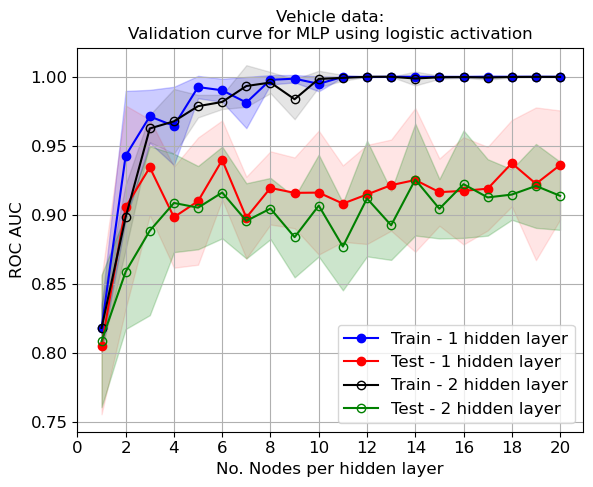

tanh
MLP with 1 hidden layers
MLP with 1 hidden layers cross validation for number of nodes per hidden layer
Maximum roc_auc score: 0.9403186588477339 at 20 nodes
Maximum accuracy score: 0.8172909841902862 at 20 nodes
MLP with 2 hidden layers
MLP with 2 hidden layers cross validation for number of nodes per hidden layer
Maximum roc_auc score: 0.9340863107397419 at 20 nodes
Maximum accuracy score: 0.8224042159236575 at 18 nodes


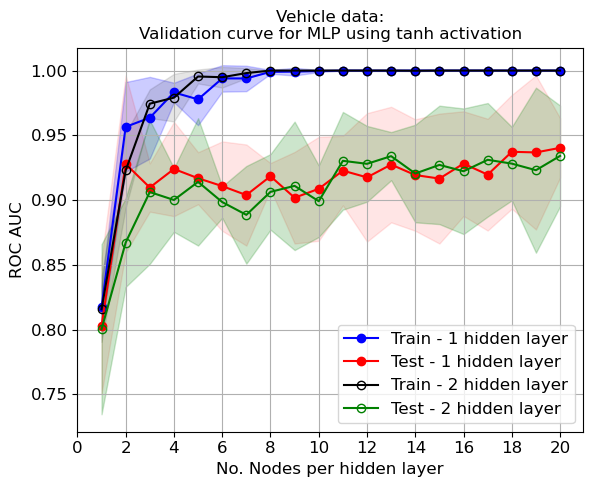

relu
MLP with 1 hidden layers
MLP with 1 hidden layers cross validation for number of nodes per hidden layer
Maximum roc_auc score: 0.9443877696320346 at 18 nodes
Maximum accuracy score: 0.8190001424298533 at 9 nodes
MLP with 2 hidden layers


KeyboardInterrupt: 

In [53]:
# ====================================
# Hyperparameter cross validation
# ====================================

#----------------------------------------------------
# A) Hidden layers and nodes per layer
#----------------------------------------------------

activation_list = ['logistic', 'tanh', 'relu']

for activation in activation_list:
    
    print(activation)
    
    ########################
    ## 1 hidden layers
    ########################
    
    train_acc_m = []
    train_acc_std = []
    test_acc_m = []
    test_acc_std = []

    train_roc_m = []
    train_roc_std = []
    test_roc_m = []
    test_roc_std = []
    
    alpha = 0.0001 # default 0.0001
    max_iter = 1000 # default 200
    hidden_layers = 1
    print(f'MLP with {hidden_layers} hidden layers')
    
    nodes_list = list(range(1,21,1))
    
    for nodes in nodes_list:
        #print(f'{nodes} nodes')
        hidden_layer_sizes = tuple([nodes])*hidden_layers
        clf = MLPClassifier(solver='lbfgs', alpha=alpha,
                            hidden_layer_sizes=hidden_layer_sizes, 
                            activation=activation, random_state=seed, max_iter=max_iter, tol=1e-6)
        
        scores = cross_validate(clf, X_train, y_train, cv=5, scoring = ['accuracy','roc_auc_ovr'], return_train_score=True, 
                                n_jobs=8)
        
    #    for estimator in scores['estimator']:
    #        print(estimator.loss_)
        
        # train and test accuracy
        train_acc_m.append(np.mean(scores['train_accuracy']))
        train_acc_std.append(np.std(scores['train_accuracy']))
        test_acc_m.append(np.mean(scores['test_accuracy']))  
        test_acc_std.append(np.std(scores['test_accuracy']))
                            
        # train and test roc auc
        train_roc_m.append(np.mean(scores['train_roc_auc_ovr']))
        train_roc_std.append(np.std(scores['train_roc_auc_ovr']))                                        
        test_roc_m.append(np.mean(scores['test_roc_auc_ovr']))
        test_roc_std.append(np.std(scores['test_roc_auc_ovr']))
    
    train_acc_m_mlp1 = np.asarray(train_acc_m)
    train_acc_std_mlp1 = np.asarray(train_acc_std)
    test_acc_m_mlp1 = np.asarray(test_acc_m)
    test_acc_std_mlp1 = np.asarray(test_acc_std) 
    
    train_roc_m_mlp1 = np.asarray(train_roc_m)
    train_roc_std_mlp1 = np.asarray(train_roc_std)
    test_roc_m_mlp1 = np.asarray(test_roc_m)
    test_roc_std_mlp1 = np.asarray(test_roc_std)
    
    print(f'MLP with {hidden_layers} hidden layers cross validation for number of nodes per hidden layer')
    print(f'Maximum roc_auc score: {max(test_roc_m)} at {nodes_list[test_roc_m.index(max(test_roc_m))]} nodes')
    print(f'Maximum accuracy score: {max(test_acc_m)} at {nodes_list[test_acc_m.index(max(test_acc_m))]} nodes')
    
    ########################
    ## 2 hidden layers
    ########################
    
    train_acc_m = []
    train_acc_std = []
    test_acc_m = []
    test_acc_std = []
    
    train_roc_m = []
    train_roc_std = []
    test_roc_m = []
    test_roc_std = []
    
    alpha = 0.0001 # default 0.0001
    max_iter = 1000 # default 200
    hidden_layers = 2
    print(f'MLP with {hidden_layers} hidden layers')
    
    nodes_list = list(range(1,21,1))
    
    for nodes in nodes_list:
    #    print(f'{nodes} nodes')
        hidden_layer_sizes = tuple([nodes])*hidden_layers
        clf = MLPClassifier(solver='lbfgs', alpha=alpha,
                            hidden_layer_sizes=hidden_layer_sizes, 
                            activation=activation, random_state=seed, max_iter=max_iter, tol=1e-6)
        
        scores = cross_validate(clf, X_train, y_train, cv=5, scoring = ['accuracy','roc_auc_ovr'], return_train_score=True, 
                                n_jobs=8)
        
    #    for estimator in scores['estimator']:
    #        print(estimator.loss_)
        
        # train and test accuracy
        train_acc_m.append(np.mean(scores['train_accuracy']))
        train_acc_std.append(np.std(scores['train_accuracy']))
        test_acc_m.append(np.mean(scores['test_accuracy']))  
        test_acc_std.append(np.std(scores['test_accuracy']))
                            
        # train and test roc auc
        train_roc_m.append(np.mean(scores['train_roc_auc_ovr']))
        train_roc_std.append(np.std(scores['train_roc_auc_ovr']))                                        
        test_roc_m.append(np.mean(scores['test_roc_auc_ovr']))
        test_roc_std.append(np.std(scores['test_roc_auc_ovr']))
    
    train_acc_m_mlp2 = np.asarray(train_acc_m)
    train_acc_std_mlp2 = np.asarray(train_acc_std)
    test_acc_m_mlp2 = np.asarray(test_acc_m)
    test_acc_std_mlp2 = np.asarray(test_acc_std) 
    
    train_roc_m_mlp2 = np.asarray(train_roc_m)
    train_roc_std_mlp2 = np.asarray(train_roc_std)
    test_roc_m_mlp2 = np.asarray(test_roc_m)
    test_roc_std_mlp2 = np.asarray(test_roc_std)
    
    print(f'MLP with {hidden_layers} hidden layers cross validation for number of nodes per hidden layer')
    print(f'Maximum roc_auc score: {max(test_roc_m)} at {nodes_list[test_roc_m.index(max(test_roc_m))]} nodes')
    print(f'Maximum accuracy score: {max(test_acc_m)} at {nodes_list[test_acc_m.index(max(test_acc_m))]} nodes')
    
    fontsize = 12

    # roc_auc
    fig = plt.figure()
    ax = fig.add_axes([0.15, 0.14, 0.79, 0.80])
    # Uniform weights
    ax.plot(nodes_list, train_roc_m_mlp1, 'o-', color='b', label='Train - 1 hidden layer')
    ax.fill_between(nodes_list, train_roc_m_mlp1 - 2*train_roc_std_mlp1, train_roc_m_mlp1 + 2*train_roc_std_mlp1, 
                    alpha=0.2, color="b")
    
    ax.plot(nodes_list, test_roc_m_mlp1, 'o-', color='r', label='Test - 1 hidden layer')
    ax.fill_between(nodes_list, test_roc_m_mlp1 - 2*test_roc_std_mlp1, test_roc_m_mlp1 + 2*test_roc_std_mlp1, 
                    alpha=0.1, color="r")
    
    # Distance weights
    ax.plot(nodes_list, train_roc_m_mlp2, 'o-', color='k', markerfacecolor='none', label='Train - 2 hidden layer')
    ax.fill_between(nodes_list, train_roc_m_mlp2 - 2*train_roc_std_mlp2, train_roc_m_mlp2 + 2*train_roc_std_mlp2, 
                    alpha=0.1, color="k")
    
    ax.plot(nodes_list, test_roc_m_mlp2, 'o-', color='g', markerfacecolor='none', label='Test - 2 hidden layer')
    ax.fill_between(nodes_list, test_roc_m_mlp2 - 2*test_roc_std_mlp2, test_roc_m_mlp2 + 2*test_roc_std_mlp2, 
                    alpha=0.2, color="g")
    
    ax.legend(fontsize=fontsize, loc="best")
    ax.tick_params(labelsize=fontsize)
    ax.set_title(f'Vehicle data:\nValidation curve for MLP using {activation} activation', fontsize=fontsize) 
    ax.set_xlabel('No. Nodes per hidden layer', fontsize=fontsize) 
    ax.set_ylabel('ROC AUC', fontsize=fontsize) 
    #ax.set_ylim(0.955, 0.96)
    ax.set_xticks(list(range(0,22,2)))
    plt.grid(True)
    plt.show()
    fig.savefig(f'mlp-roc_auc-nodes-{activation}.png')
    plt.close(fig)
    

logistic
MLP with 1 hidden layers
MLP with 1 hidden layers cross validation for number of nodes per hidden layer
Maximum roc_auc score: 0.9571120895767417 at 18 nodes
Maximum accuracy score: 0.8258082894174619 at 15 nodes
MLP with 2 hidden layers
MLP with 2 hidden layers cross validation for number of nodes per hidden layer
Maximum roc_auc score: 0.9608400139557596 at 10 nodes
Maximum accuracy score: 0.8358923230309074 at 13 nodes


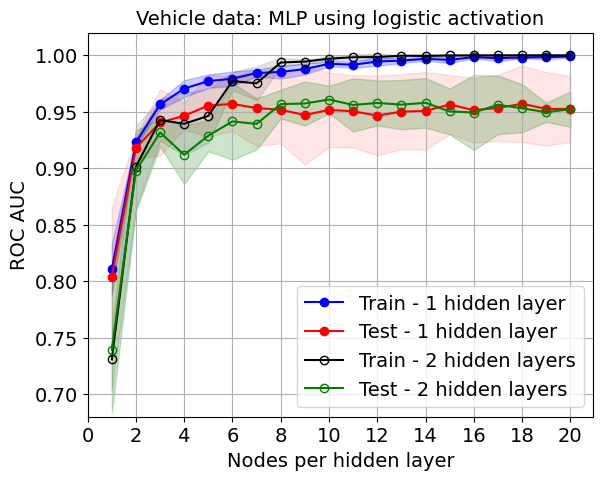

tanh
MLP with 1 hidden layers
MLP with 1 hidden layers cross validation for number of nodes per hidden layer
Maximum roc_auc score: 0.9525886588184218 at 20 nodes
Maximum accuracy score: 0.8138726677111523 at 10 nodes
MLP with 2 hidden layers
MLP with 2 hidden layers cross validation for number of nodes per hidden layer
Maximum roc_auc score: 0.9555120662983813 at 6 nodes
Maximum accuracy score: 0.8190428713858424 at 20 nodes


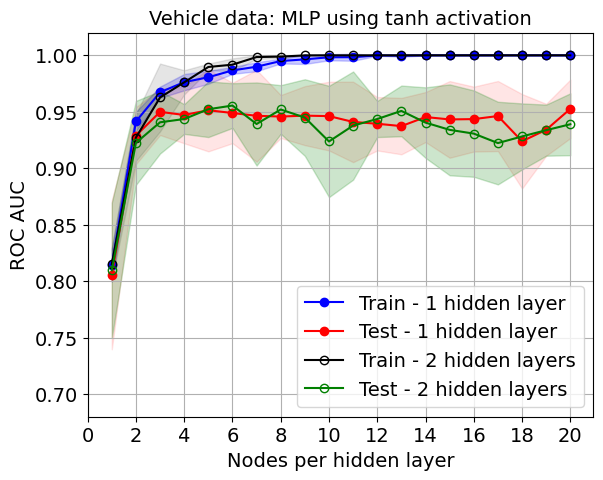

relu
MLP with 1 hidden layers
MLP with 1 hidden layers cross validation for number of nodes per hidden layer
Maximum roc_auc score: 0.9550586067381113 at 15 nodes
Maximum accuracy score: 0.82746047571571 at 15 nodes
MLP with 2 hidden layers
MLP with 2 hidden layers cross validation for number of nodes per hidden layer
Maximum roc_auc score: 0.9525414727586428 at 6 nodes
Maximum accuracy score: 0.8088306509044296 at 12 nodes


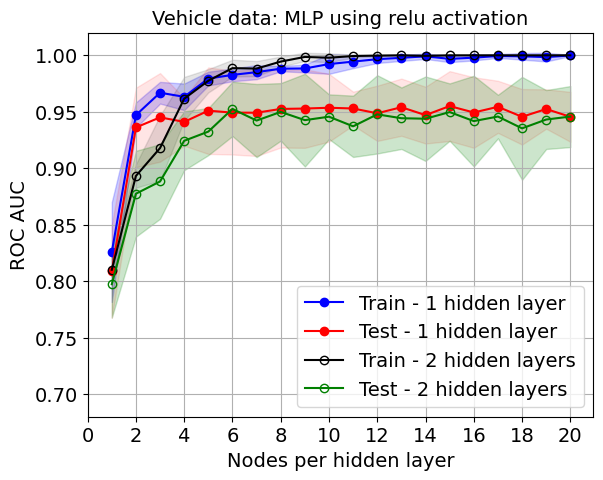

In [216]:
# ====================================
# Repeat with ADAM solver
# ====================================

#----------------------------------------------------
# A) Hidden layers and nodes per layer
#----------------------------------------------------

activation_list = ['logistic', 'tanh', 'relu']

for activation in activation_list:
    
    print(activation)
    
    ########################
    ## 1 hidden layers
    ########################
    
    train_acc_m = []
    train_acc_std = []
    test_acc_m = []
    test_acc_std = []

    train_roc_m = []
    train_roc_std = []
    test_roc_m = []
    test_roc_std = []
    
    alpha = 0.0001 # default 0.0001
    max_iter = 4000 # default 200
    hidden_layers = 1
    print(f'MLP with {hidden_layers} hidden layers')
    
    nodes_list = list(range(1,21,1))
    
    for nodes in nodes_list:
        #print(f'{nodes} nodes')
        hidden_layer_sizes = tuple([nodes])*hidden_layers
        clf = MLPClassifier(solver='adam', alpha=alpha,
                            hidden_layer_sizes=hidden_layer_sizes, 
                            activation=activation, random_state=seed, max_iter=max_iter, tol=1e-6)
        
        scores = cross_validate(clf, X_train, y_train, cv=5, scoring = ['accuracy','roc_auc_ovr'], return_train_score=True, 
                                n_jobs=8)
        
    #    for estimator in scores['estimator']:
    #        print(estimator.loss_)
        
        # train and test accuracy
        train_acc_m.append(np.mean(scores['train_accuracy']))
        train_acc_std.append(np.std(scores['train_accuracy']))
        test_acc_m.append(np.mean(scores['test_accuracy']))  
        test_acc_std.append(np.std(scores['test_accuracy']))
                            
        # train and test roc auc
        train_roc_m.append(np.mean(scores['train_roc_auc_ovr']))
        train_roc_std.append(np.std(scores['train_roc_auc_ovr']))                                        
        test_roc_m.append(np.mean(scores['test_roc_auc_ovr']))
        test_roc_std.append(np.std(scores['test_roc_auc_ovr']))
    
    train_acc_m_mlp1 = np.asarray(train_acc_m)
    train_acc_std_mlp1 = np.asarray(train_acc_std)
    test_acc_m_mlp1 = np.asarray(test_acc_m)
    test_acc_std_mlp1 = np.asarray(test_acc_std) 
    
    train_roc_m_mlp1 = np.asarray(train_roc_m)
    train_roc_std_mlp1 = np.asarray(train_roc_std)
    test_roc_m_mlp1 = np.asarray(test_roc_m)
    test_roc_std_mlp1 = np.asarray(test_roc_std)
    
    print(f'MLP with {hidden_layers} hidden layers cross validation for number of nodes per hidden layer')
    print(f'Maximum roc_auc score: {max(test_roc_m)} at {nodes_list[test_roc_m.index(max(test_roc_m))]} nodes')
    print(f'Maximum accuracy score: {max(test_acc_m)} at {nodes_list[test_acc_m.index(max(test_acc_m))]} nodes')
    
    ########################
    ## 2 hidden layers
    ########################
    
    train_acc_m = []
    train_acc_std = []
    test_acc_m = []
    test_acc_std = []
    
    train_roc_m = []
    train_roc_std = []
    test_roc_m = []
    test_roc_std = []
    
    alpha = 0.0001 # default 0.0001
    max_iter = 4000 # default 200
    hidden_layers = 2
    print(f'MLP with {hidden_layers} hidden layers')
    
    nodes_list = list(range(1,21,1))
    
    for nodes in nodes_list:
    #    print(f'{nodes} nodes')
        hidden_layer_sizes = tuple([nodes])*hidden_layers
        clf = MLPClassifier(solver='adam', alpha=alpha,
                            hidden_layer_sizes=hidden_layer_sizes, 
                            activation=activation, random_state=seed, max_iter=max_iter, tol=1e-6)
        
        scores = cross_validate(clf, X_train, y_train, cv=5, scoring = ['accuracy','roc_auc_ovr'], return_train_score=True, 
                                n_jobs=8)
        
    #    for estimator in scores['estimator']:
    #        print(estimator.loss_)
        
        # train and test accuracy
        train_acc_m.append(np.mean(scores['train_accuracy']))
        train_acc_std.append(np.std(scores['train_accuracy']))
        test_acc_m.append(np.mean(scores['test_accuracy']))  
        test_acc_std.append(np.std(scores['test_accuracy']))
                            
        # train and test roc auc
        train_roc_m.append(np.mean(scores['train_roc_auc_ovr']))
        train_roc_std.append(np.std(scores['train_roc_auc_ovr']))                                        
        test_roc_m.append(np.mean(scores['test_roc_auc_ovr']))
        test_roc_std.append(np.std(scores['test_roc_auc_ovr']))
    
    train_acc_m_mlp2 = np.asarray(train_acc_m)
    train_acc_std_mlp2 = np.asarray(train_acc_std)
    test_acc_m_mlp2 = np.asarray(test_acc_m)
    test_acc_std_mlp2 = np.asarray(test_acc_std) 
    
    train_roc_m_mlp2 = np.asarray(train_roc_m)
    train_roc_std_mlp2 = np.asarray(train_roc_std)
    test_roc_m_mlp2 = np.asarray(test_roc_m)
    test_roc_std_mlp2 = np.asarray(test_roc_std)
    
    print(f'MLP with {hidden_layers} hidden layers cross validation for number of nodes per hidden layer')
    print(f'Maximum roc_auc score: {max(test_roc_m)} at {nodes_list[test_roc_m.index(max(test_roc_m))]} nodes')
    print(f'Maximum accuracy score: {max(test_acc_m)} at {nodes_list[test_acc_m.index(max(test_acc_m))]} nodes')
    
    fontsize = 14

    # roc_auc
    fig = plt.figure()
    ax = fig.add_axes([0.15, 0.14, 0.79, 0.80])
    # Uniform weights
    ax.plot(nodes_list, train_roc_m_mlp1, 'o-', color='b', label='Train - 1 hidden layer')
    ax.fill_between(nodes_list, train_roc_m_mlp1 - 2*train_roc_std_mlp1, train_roc_m_mlp1 + 2*train_roc_std_mlp1, 
                    alpha=0.2, color="b")
    
    ax.plot(nodes_list, test_roc_m_mlp1, 'o-', color='r', label='Test - 1 hidden layer')
    ax.fill_between(nodes_list, test_roc_m_mlp1 - 2*test_roc_std_mlp1, test_roc_m_mlp1 + 2*test_roc_std_mlp1, 
                    alpha=0.1, color="r")
    
    # Distance weights
    ax.plot(nodes_list, train_roc_m_mlp2, 'o-', color='k', markerfacecolor='none', label='Train - 2 hidden layers')
    ax.fill_between(nodes_list, train_roc_m_mlp2 - 2*train_roc_std_mlp2, train_roc_m_mlp2 + 2*train_roc_std_mlp2, 
                    alpha=0.1, color="k")
    
    ax.plot(nodes_list, test_roc_m_mlp2, 'o-', color='g', markerfacecolor='none', label='Test - 2 hidden layers')
    ax.fill_between(nodes_list, test_roc_m_mlp2 - 2*test_roc_std_mlp2, test_roc_m_mlp2 + 2*test_roc_std_mlp2, 
                    alpha=0.2, color="g")
    
    ax.legend(fontsize=fontsize, loc='lower right')
    ax.tick_params(labelsize=fontsize)
    ax.set_title(f'Vehicle data: MLP using {activation} activation', fontsize=fontsize) 
    ax.set_xlabel('Nodes per hidden layer', fontsize=fontsize) 
    ax.set_ylabel('ROC AUC', fontsize=fontsize) 
    ax.set_ylim(0.68, 1.02)
    ax.set_xticks(list(range(0,22,2)))
    plt.grid(True)
    plt.show()
    fig.savefig(f'mlp-roc_auc-nodes-{activation}.png')
    plt.close(fig)
    

In [59]:
tuple([3])*2

(3, 3)

In [32]:
#----------------------------------------------------
# B) MLP regularization term
#----------------------------------------------------
train_acc_m = []
train_acc_std = []
test_acc_m = []
test_acc_std = []

train_roc_m = []
train_roc_std = []
test_roc_m = []
test_roc_std = []


alpha_list = [0.0, 1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 5e-1, 1.0, 5.0, 10, 50, 100, 1000]
hidden_layers = 1
nodes = 6
max_iter = 4000 # default 200

for alpha in alpha_list:
    clf = MLPClassifier(solver='adam', alpha=alpha, 
                        hidden_layer_sizes=tuple([nodes])*hidden_layers, 
                        activation='logistic', random_state=seed, max_iter=max_iter, tol=1e-7)
    
    scores = cross_validate(clf, X_train, y_train, cv=5, scoring = ['accuracy','roc_auc_ovr'], return_train_score=True, 
                            n_jobs=8)

    # train and test accuracy
    train_acc_m.append(np.mean(scores['train_accuracy']))
    train_acc_std.append(np.std(scores['train_accuracy']))
    test_acc_m.append(np.mean(scores['test_accuracy']))  
    test_acc_std.append(np.std(scores['test_accuracy']))
                        
    # train and test roc auc
    train_roc_m.append(np.mean(scores['train_roc_auc_ovr']))
    train_roc_std.append(np.std(scores['train_roc_auc_ovr']))                                        
    test_roc_m.append(np.mean(scores['test_roc_auc_ovr']))
    test_roc_std.append(np.std(scores['test_roc_auc_ovr']))


train_acc_m_mlp_r1 = np.asarray(train_acc_m)
train_acc_std_mlp_r1 = np.asarray(train_acc_std)
test_acc_m_mlp_r1 = np.asarray(test_acc_m)
test_acc_std_mlp_r1 = np.asarray(test_acc_std) 

train_roc_m_mlp_r1 = np.asarray(train_roc_m)
train_roc_std_mlp_r1 = np.asarray(train_roc_std)
test_roc_m_mlp_r1 = np.asarray(test_roc_m)
test_roc_std_mlp_r1 = np.asarray(test_roc_std)

print(f'MLP with {hidden_layers} hidden layers cross validation for the regularization term')
print(f'Maximum roc_auc score: {max(test_roc_m)} at alpha={alpha_list[test_roc_m.index(max(test_roc_m))]}')
print(f'Maximum accuracy score: {max(test_acc_m)} at alpha={alpha_list[test_acc_m.index(max(test_acc_m))]}')

MLP with 1 hidden layers cross validation for the regularization term
Maximum roc_auc score: 0.9570297368283873 at alpha=0.0005
Maximum accuracy score: 0.8223899729383278 at alpha=0.05


In [33]:
print(f'MLP with {hidden_layers} hidden layers cross validation for the regularization term')
print(f'Maximum roc_auc score: {max(test_roc_m)} at alpha={alpha_list[test_roc_m.index(max(test_roc_m))]}')
print(f'Maximum accuracy score: {max(test_acc_m)} at alpha={alpha_list[test_acc_m.index(max(test_acc_m))]}')

MLP with 1 hidden layers cross validation for the regularization term
Maximum roc_auc score: 0.9570297368283873 at alpha=0.0005
Maximum accuracy score: 0.8223899729383278 at alpha=0.05


In [62]:
test_roc_m_mlp_r1

array([0.95695416, 0.95695416, 0.95693522, 0.95693522, 0.95702974,
       0.95702952, 0.95701183, 0.95675022, 0.95460105, 0.95182495,
       0.93583372, 0.91911935, 0.83276236, 0.70194695, 0.66574784,
       0.69781467, 0.67656014])

In [63]:
test_acc_m_mlp_r1

array([0.81559607, 0.81559607, 0.81559607, 0.81559607, 0.81559607,
       0.81559607, 0.81559607, 0.81559607, 0.82238997, 0.81053981,
       0.78349238, 0.75983478, 0.62267483, 0.39591226, 0.25718559,
       0.25718559, 0.25718559])

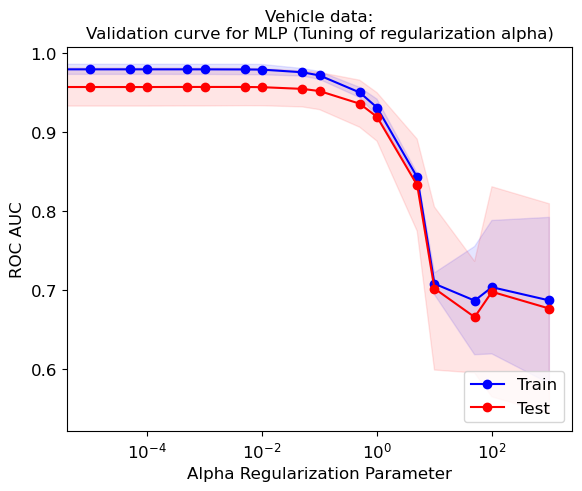

In [35]:
fontsize = 12

# roc_auc
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.79, 0.80])
ax.plot(alpha_list, train_roc_m_mlp_r1, 'o-', color='b', label='Train')
ax.fill_between(alpha_list, train_roc_m_mlp_r1 - 2*train_roc_std_mlp_r1, train_roc_m_mlp_r1 + 2*train_roc_std_mlp_r1, 
                alpha=0.1, color="b")

ax.plot(alpha_list, test_roc_m_mlp_r1, 'o-', color='r', label='Test')
ax.fill_between(alpha_list, test_roc_m_mlp_r1 - 2*test_roc_std_mlp_r1, test_roc_m_mlp_r1 + 2*test_roc_std_mlp_r1, 
                alpha=0.1, color="r")

ax.set_xscale("log", base=10)
ax.legend(fontsize=fontsize, loc="lower right")
ax.tick_params(labelsize=fontsize)
ax.set_title('Vehicle data:\nValidation curve for MLP (Tuning of regularization alpha)', fontsize=fontsize) 
ax.set_xlabel('Alpha Regularization Parameter', fontsize=fontsize) 
ax.set_ylabel('ROC AUC', fontsize=fontsize) 
plt.show()
fig.savefig('mlp-roc_auc_alpha.png')
plt.close(fig)

In [36]:
#----------------------------------------------------
# B) Activation
#----------------------------------------------------
train_acc_m = []
train_acc_std = []
test_acc_m = []
test_acc_std = []

train_roc_m = []
train_roc_std = []
test_roc_m = []
test_roc_std = []


activation_list = ['identity', 'logistic', 'tanh', 'relu']
hidden_layers = 1
nodes = 6
alpha = 0.0001 # keep default

for activation in activation_list:
    clf = MLPClassifier(solver='adam', alpha=alpha, 
                        hidden_layer_sizes=tuple([nodes])*hidden_layers, 
                        activation=activation, random_state=seed, max_iter=max_iter, tol=1e-7)
    
    scores = cross_validate(clf, X_train, y_train, cv=5, scoring = ['accuracy','roc_auc_ovr'], return_train_score=True, 
                            n_jobs=8)

    # train and test accuracy
    train_acc_m.append(np.mean(scores['train_accuracy']))
    train_acc_std.append(np.std(scores['train_accuracy']))
    test_acc_m.append(np.mean(scores['test_accuracy']))  
    test_acc_std.append(np.std(scores['test_accuracy']))
                        
    # train and test roc auc
    train_roc_m.append(np.mean(scores['train_roc_auc_ovr']))
    train_roc_std.append(np.std(scores['train_roc_auc_ovr']))                                        
    test_roc_m.append(np.mean(scores['test_roc_auc_ovr']))
    test_roc_std.append(np.std(scores['test_roc_auc_ovr']))


train_acc_m_mlp_r2 = np.asarray(train_acc_m)
train_acc_std_mlp_r2 = np.asarray(train_acc_std)
test_acc_m_mlp_r2 = np.asarray(test_acc_m)
test_acc_std_mlp_r2 = np.asarray(test_acc_std) 

train_roc_m_mlp_r2 = np.asarray(train_roc_m)
train_roc_std_mlp_r2 = np.asarray(train_roc_std)
test_roc_m_mlp_r2 = np.asarray(test_roc_m)
test_roc_std_mlp_r2 = np.asarray(test_roc_std)

print(f'MLP with {hidden_layers} hidden layers cross validation for the activation function')
print(f'Maximum roc_auc score: {max(test_roc_m)} at activation={activation_list[test_roc_m.index(max(test_roc_m))]}')
print(f'Maximum accuracy score: {max(test_acc_m)} at activation={activation_list[test_acc_m.index(max(test_acc_m))]}')

MLP with 1 hidden layers cross validation for the activation function
Maximum roc_auc score: 0.9569352224409086 at activation=logistic
Maximum accuracy score: 0.8155960689360491 at activation=logistic


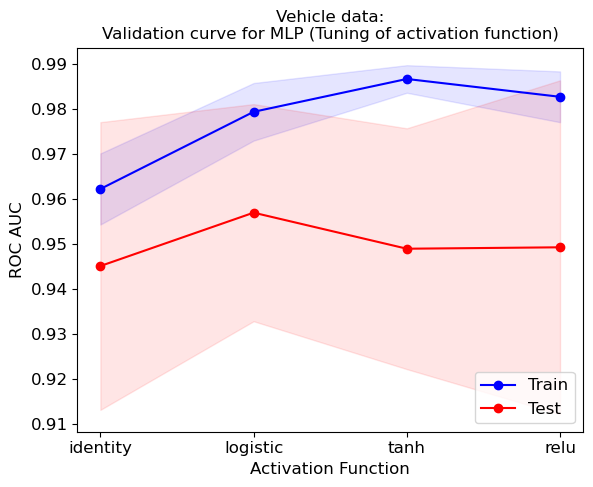

In [37]:
fontsize = 12

# roc_auc
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.79, 0.80])
ax.plot(activation_list, train_roc_m_mlp_r2, 'o-', color='b', label='Train')
ax.fill_between(activation_list, train_roc_m_mlp_r2 - 2*train_roc_std_mlp_r2, train_roc_m_mlp_r2 + 2*train_roc_std_mlp_r2, 
                alpha=0.1, color="b")

ax.plot(activation_list, test_roc_m_mlp_r2, 'o-', color='r', label='Test')
ax.fill_between(activation_list, test_roc_m_mlp_r2 - 2*test_roc_std_mlp_r2, test_roc_m_mlp_r2 + 2*test_roc_std_mlp_r2, 
                alpha=0.1, color="r")

ax.legend(fontsize=fontsize, loc="lower right")
ax.tick_params(labelsize=fontsize)
ax.set_title('Vehicle data:\nValidation curve for MLP (Tuning of activation function)', fontsize=fontsize) 
ax.set_xlabel('Activation Function', fontsize=fontsize) 
ax.set_ylabel('ROC AUC', fontsize=fontsize) 
plt.show()
fig.savefig('mlp-roc_auc_activation.png')
plt.close(fig)

In [77]:
# ====================================
# MLP iterative learning curves
# ====================================

train_roc_m = []
train_roc_std = []
test_roc_m = []
test_roc_std = []

max_iter_list = [1, 2, 4, 6, 8, 10, 15, 20, 30, 40, 50] + list(range(100,6100,100)) + [10000, 20000]
hidden_layers = 1
nodes = 6
for max_iter in max_iter_list:
#    print(f'max_iter={max_iter}')
    clf = MLPClassifier(solver='adam', max_iter=max_iter, hidden_layer_sizes=tuple([nodes])*hidden_layers, 
                    activation='logistic', random_state=seed, tol=1e-20)
    
    scores = cross_validate(clf, X_train, y_train, cv=5, scoring = ['roc_auc_ovr'], return_train_score=True, n_jobs=8)
                        
    # train and test roc auc
    train_roc_m.append(np.mean(scores['train_roc_auc_ovr']))
    train_roc_std.append(np.std(scores['train_roc_auc_ovr']))                                        
    test_roc_m.append(np.mean(scores['test_roc_auc_ovr']))
    test_roc_std.append(np.std(scores['test_roc_auc_ovr']))

train_roc_m_mlp_iter = np.asarray(train_roc_m)
train_roc_std_mlp_iter = np.asarray(train_roc_std)
test_roc_m_mlp_iter = np.asarray(test_roc_m)
test_roc_std_mlp_iter = np.asarray(test_roc_std)
    
print(f'MLP number of iteration')
print(f'Maximum roc_auc score: {max(test_roc_m)} at {max_iter_list[test_roc_m.index(max(test_roc_m))]} iterations')

MLP number of iteration
Maximum roc_auc score: 0.9573116461377505 at 5500 iterations


In [82]:
test_roc_m_mlp_iter

array([0.4906226 , 0.50555179, 0.53495219, 0.56802475, 0.60003121,
       0.62790622, 0.67480477, 0.69915132, 0.71732633, 0.72421255,
       0.73025227, 0.76561022, 0.83745167, 0.86949579, 0.88846156,
       0.90456092, 0.91427061, 0.92150711, 0.92698048, 0.93080552,
       0.93421594, 0.93638069, 0.93913425, 0.94090431, 0.94248297,
       0.94420144, 0.94514421, 0.94561105, 0.94699021, 0.94789639,
       0.94821414, 0.9492508 , 0.94964393, 0.95082208, 0.95110747,
       0.95205116, 0.95273266, 0.95328507, 0.95335663, 0.95349111,
       0.95405667, 0.95437945, 0.95452988, 0.95470023, 0.95515429,
       0.95593371, 0.95612466, 0.95625441, 0.95615881, 0.95659682,
       0.95693522, 0.95674654, 0.95642486, 0.95670921, 0.95680303,
       0.95701386, 0.95668797, 0.95678453, 0.95721784, 0.95727392,
       0.95727112, 0.957045  , 0.95702683, 0.957216  , 0.95723406,
       0.95731165, 0.95708443, 0.95717896, 0.95712214, 0.95712214,
       0.95712214, 0.95712214, 0.95712214])

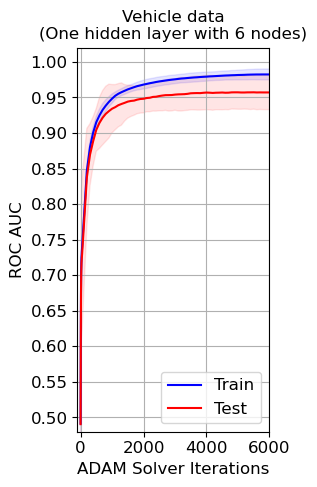

In [207]:
fontsize = 12

# roc_auc
fig = plt.figure(figsize=(3.2,4.8))
ax = fig.add_axes([0.24, 0.11, 0.60, 0.80])
ax.plot(max_iter_list, train_roc_m_mlp_iter, color='b', label='Train')
ax.fill_between(max_iter_list, train_roc_m_mlp_iter - 2*train_roc_std_mlp_iter, train_roc_m_mlp_iter + 2*train_roc_std_mlp_iter, 
                alpha=0.1, color="b")

ax.plot(max_iter_list, test_roc_m_mlp_iter, color='r', label='Test')
ax.fill_between(max_iter_list, test_roc_m_mlp_iter - 2*test_roc_std_mlp_iter, test_roc_m_mlp_iter + 2*test_roc_std_mlp_iter, 
                alpha=0.1, color="r")

ax.legend(fontsize=fontsize, loc="lower right")
ax.tick_params(labelsize=fontsize)
ax.set_title('Vehicle data\n(One hidden layer with 6 nodes)', fontsize=fontsize) 
ax.set_xlabel('ADAM Solver Iterations', fontsize=fontsize) 
ax.set_ylabel('ROC AUC', fontsize=fontsize) 
ax.set_xlim(-100, 6000)
ax.set_ylim(0.48, 1.02)
ax.set_xticks(np.arange(0,8000,2000))
ax.set_yticks(np.arange(0.5,1.05,0.05))
plt.grid(True)
plt.show()
fig.savefig('mlp-roc_auc_iter_learning.png')
plt.close(fig)

In [40]:
########################
## 1 hidden layers
########################

train_roc_auc = []
test_roc_auc = []
train_acc = []
test_acc = []

activation = 'relu'
alpha = 5.0
hidden_layers = 1
print(f'MLP with {hidden_layers} hidden layers')

nodes_list = [7]

for nodes in nodes_list:
    print(f'{nodes} nodes')
    hidden_layer_sizes = (nodes)*hidden_layers
    clf = MLPClassifier(solver='lbfgs', alpha=alpha,
                        hidden_layer_sizes=[7,4], 
                        activation=activation, random_state=seed, max_iter=1000, learning_rate_init=0.001, tol=0.0001)
    
    scores = cross_validate(clf, X_train, y_train, cv=5, scoring = ['accuracy','roc_auc'], return_train_score=True, 
                            n_jobs=10)
    
#    for estimator in scores['estimator']:
#        print(estimator.loss_)
    
    train_acc.append(np.mean(scores['train_accuracy']))
    test_acc.append(np.mean(scores['test_accuracy']))    
    
    train_roc_auc.append(np.mean(scores['train_roc_auc']))
    test_roc_auc.append(np.mean(scores['test_roc_auc']))


print(f'MLP with {hidden_layers} hidden layers cross validation for number of nodes per hidden layer')
print(f'Maximum roc_auc score: {max(test_roc_auc)} at {nodes_list[test_roc_auc.index(max(test_roc_auc))]} nodes')
print(f'Maximum accuracy score: {max(test_acc)} at {nodes_list[test_acc.index(max(test_acc))]} nodes')


MLP with 1 hidden layers
7 nodes
MLP with 1 hidden layers cross validation for number of nodes per hidden layer
Maximum roc_auc score: nan at 7 nodes
Maximum accuracy score: 0.8123059393248825 at 7 nodes


### Learning curves

In [83]:
# KNN learning curves
clf = KNeighborsClassifier(n_neighbors=12, weights='distance', p=1) 
train_sizes = np.arange(5,105,5)*0.01*X_train.shape[0]*0.80
train_sizes = train_sizes.astype(int)
train_sizes_knn, train_scores_knn, validation_scores_knn = learning_curve(
estimator = clf,
X = X_train,
y = y_train, train_sizes = train_sizes, cv = 5,
scoring = 'roc_auc_ovr', shuffle = True, n_jobs=8, random_state=seed)

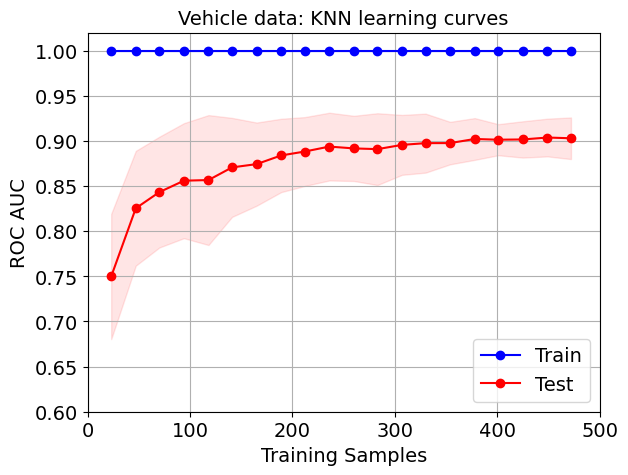

In [220]:
train_mean = train_scores_knn.mean(axis = 1)
train_std = train_scores_knn.std(axis = 1)
test_mean = validation_scores_knn.mean(axis = 1)
test_std = validation_scores_knn.std(axis = 1)

fontsize = 14
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.8, 0.79])
ax.plot(train_sizes_knn, train_mean, '-o', label='Train', color="b")
ax.fill_between(train_sizes_knn, train_mean - 2*train_std, train_mean + 2*train_std, 
                alpha=0.1, color="b")
ax.plot(train_sizes_knn, test_mean, '-o', label='Test', color="r")
ax.fill_between(train_sizes_knn, test_mean - 2*test_std, test_mean + 2*test_std, 
                alpha=0.1, color="r")
ax.legend(fontsize=fontsize, loc="lower right") 
ax.tick_params(labelsize=fontsize)
ax.set_title('Vehicle data: KNN learning curves', fontsize=fontsize) 
ax.set_xlabel('Training Samples', fontsize=fontsize) 
ax.set_ylabel('ROC AUC', fontsize=fontsize) 
ax.set_xlim(0, 500)
ax.set_ylim(0.60, 1.02)
ax.set_xticks(np.arange(0,600,100))
ax.set_yticks(np.arange(0.60,1.05,0.05))
plt.grid(True)
plt.show()
fig.savefig('knn-learning_curves-roc_auc.png')
plt.close(fig)

In [165]:
# SVM learning curves
clf = svm.SVC(kernel='rbf', gamma='scale', C=10.0, probability=True, random_state=100)  
train_sizes = np.arange(5,105,5)*0.01*X_train.shape[0]*0.80
train_sizes = train_sizes.astype(int)
train_sizes_svm, train_scores_svm, validation_scores_svm = learning_curve(
estimator = clf,
X = X_train,
y = y_train, train_sizes = train_sizes, cv = 5,
    scoring = 'roc_auc_ovr', shuffle = True, random_state=100) 

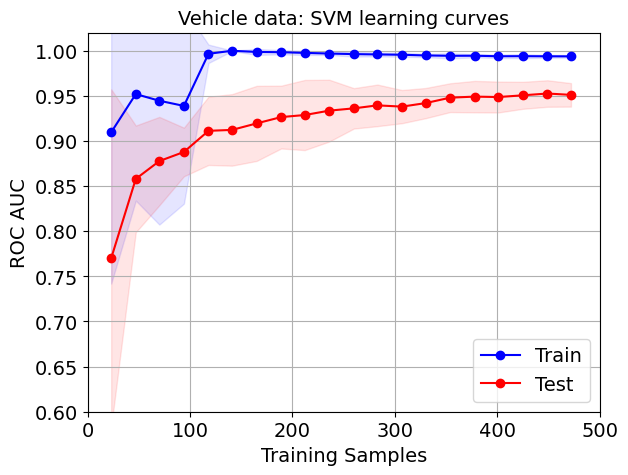

In [221]:
train_mean = train_scores_svm.mean(axis = 1)
train_std = train_scores_svm.std(axis = 1)
test_mean = validation_scores_svm.mean(axis = 1)
test_std = validation_scores_svm.std(axis = 1)

fontsize = 14
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.8, 0.79])
ax.plot(train_sizes_svm, train_mean, '-o', label='Train', color="b")
ax.fill_between(train_sizes_svm, train_mean - 2*train_std, train_mean + 2*train_std, 
                alpha=0.1, color="b")
ax.plot(train_sizes_knn, test_mean, '-o', label='Test', color="r")
ax.fill_between(train_sizes_svm, test_mean - 2*test_std, test_mean + 2*test_std, 
                alpha=0.1, color="r")
ax.legend(fontsize=fontsize, loc="lower right")
ax.tick_params(labelsize=fontsize)
ax.set_title('Vehicle data: SVM learning curves', fontsize=fontsize) 
ax.set_xlabel('Training Samples', fontsize=fontsize) 
ax.set_ylabel('ROC AUC', fontsize=fontsize) 
ax.set_xlim(0, 500)
ax.set_ylim(0.60, 1.02)
ax.set_xticks(np.arange(0,600,100))
ax.set_yticks(np.arange(0.60,1.05,0.05))
plt.grid(True)
plt.show()
fig.savefig('svm-learning_curves-roc_auc.png')
plt.close(fig)

In [169]:
# MLP learning curves
clf = MLPClassifier(solver='adam', 
                    hidden_layer_sizes=[6], 
                    activation='logistic', random_state=seed, max_iter=4000, tol=1e-6) 
train_sizes = np.arange(5,105,5)*0.01*X_train.shape[0]*0.80
train_sizes = train_sizes.astype(int)
train_sizes_mlp, train_scores_mlp, validation_scores_mlp = learning_curve(
estimator = clf,
X = X_train,
y = y_train, train_sizes = train_sizes, cv = 5,
scoring = 'roc_auc_ovr', shuffle = True, n_jobs=8, random_state=seed)

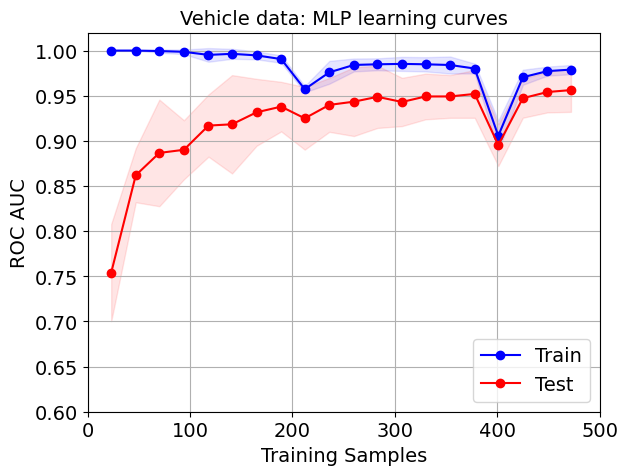

In [222]:
train_mean = train_scores_mlp.mean(axis = 1)
train_std = train_scores_mlp.std(axis = 1)
test_mean = validation_scores_mlp.mean(axis = 1)
test_std = validation_scores_mlp.std(axis = 1)

fontsize = 14
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.8, 0.79])
ax.plot(train_sizes_mlp, train_mean, '-o', label='Train', color="b")
ax.fill_between(train_sizes_mlp, train_mean - 2*train_std, train_mean + 2*train_std, 
                alpha=0.1, color="b")
ax.plot(train_sizes_mlp, test_mean, '-o', label='Test', color="r")
ax.fill_between(train_sizes_mlp, test_mean - 2*test_std, test_mean + 2*test_std, 
                alpha=0.1, color="r")
ax.legend(fontsize=fontsize, loc="lower right")
ax.tick_params(labelsize=fontsize)
ax.set_title('Vehicle data: MLP learning curves', fontsize=fontsize) 
ax.set_xlabel('Training Samples', fontsize=fontsize) 
ax.set_ylabel('ROC AUC', fontsize=fontsize) 
ax.set_xlim(0, 500)
ax.set_ylim(0.60, 1.02)
ax.set_xticks(np.arange(0,600,100))
ax.set_yticks(np.arange(0.60,1.05,0.05))
plt.grid(True)
plt.show()
fig.savefig('MLP-learning_curves-roc_auc.png')
plt.close(fig)

In [190]:
# FINAL TRAINING and TEST

# KNN
clf = KNeighborsClassifier(n_neighbors=12, weights='distance', p=1)

tic = time.perf_counter()
clf.fit(X_train, y_train)
toc = time.perf_counter()
knn_train_time = toc-tic

tic = time.perf_counter()
y_pred_train_knn = clf.predict(X_train)
toc = time.perf_counter()
knn_pred_train_time = toc-tic

tic = time.perf_counter()
y_pred_test_knn = clf.predict(X_test)
toc = time.perf_counter()
knn_pred_test_time = toc-tic

train_acc_knn = accuracy_score(y_train, y_pred_train_knn)
test_acc_knn = accuracy_score(y_test, y_pred_test_knn)

train_roc_knn = roc_auc_score(y_train, clf.predict_proba(X_train), average='macro', multi_class='ovr')
test_roc_knn = roc_auc_score(y_test, clf.predict_proba(X_test), average='macro', multi_class='ovr')

print('kNN training and test')
print(f'train accuracy: {train_acc_knn}') 
print(f'train roc_auc: {train_roc_knn}')

print(f'test accuracy: {test_acc_knn}')
print(f'test roc_auc: {test_roc_knn}') 

print(f'Time to train: {knn_train_time}')
print(f'Time to predict training set: {knn_pred_train_time}') 
print(f'Time to predict test set: {knn_pred_test_time}') 

# SVM
clf = svm.SVC(kernel='rbf', gamma='scale', C=10.0, probability=True, random_state=seed)

tic = time.perf_counter()
clf.fit(X_train, y_train)
toc = time.perf_counter()
svm_train_time = toc-tic

tic = time.perf_counter()
y_pred_train_svm = clf.predict(X_train)
toc = time.perf_counter()
svm_pred_train_time = toc-tic

tic = time.perf_counter()
y_pred_test_svm = clf.predict(X_test)
toc = time.perf_counter()
svm_pred_test_time = toc-tic

train_acc_svm = accuracy_score(y_train, y_pred_train_svm)
test_acc_svm = accuracy_score(y_test, y_pred_test_svm)

train_roc_svm = roc_auc_score(y_train, clf.predict_proba(X_train), average='macro', multi_class='ovr')
test_roc_svm = roc_auc_score(y_test, clf.predict_proba(X_test), average='macro', multi_class='ovr')

print('\nSVM training and test')
print(f'train accuracy: {train_acc_svm}') 
print(f'train roc_auc: {train_roc_svm}')

print(f'test accuracy: {test_acc_svm}')
print(f'test roc_auc: {test_roc_svm}') 

print(f'Time to train: {svm_train_time}')
print(f'Time to predict training set: {svm_pred_train_time}') 
print(f'Time to predict test set: {svm_pred_test_time}') 

# MLP
clf = MLPClassifier(solver='adam', 
                    hidden_layer_sizes=[6], 
                    activation='logistic', random_state=seed, max_iter=4000, tol=1e-6)

tic = time.perf_counter()
clf.fit(X_train, y_train)
toc = time.perf_counter()
mlp_train_time = toc-tic

tic = time.perf_counter()
y_pred_train_mlp = clf.predict(X_train)
toc = time.perf_counter()
mlp_pred_train_time = toc-tic

tic = time.perf_counter()
y_pred_test_mlp = clf.predict(X_test)
toc = time.perf_counter()
mlp_pred_test_time = toc-tic

train_acc_mlp = accuracy_score(y_train, y_pred_train_mlp)
test_acc_mlp = accuracy_score(y_test, y_pred_test_mlp)

train_roc_mlp = roc_auc_score(y_train, clf.predict_proba(X_train), average='macro', multi_class='ovr')
test_roc_mlp = roc_auc_score(y_test, clf.predict_proba(X_test), average='macro', multi_class='ovr')

print('\nMLP training and test')
print(f'train accuracy: {train_acc_mlp}') 
print(f'train roc_auc: {train_roc_mlp}')

print(f'test accuracy: {test_acc_mlp}')
print(f'test roc_auc: {test_roc_mlp}') 

print(f'Time to train: {mlp_train_time}')
print(f'Time to predict training set: {mlp_pred_train_time}') 
print(f'Time to predict test set: {mlp_pred_test_time}') 

kNN training and test
train accuracy: 1.0
train roc_auc: 1.0
test accuracy: 0.7204724409448819
test roc_auc: 0.9093287606034316
Time to train: 0.004677499993704259
Time to predict training set: 0.07439810002688318
Time to predict test set: 0.09427880001021549

SVM training and test
train accuracy: 0.9407783417935702
train roc_auc: 0.9928944895086449
test accuracy: 0.7874015748031497
test roc_auc: 0.9491770958795681
Time to train: 0.12857790000271052
Time to predict training set: 0.022189399984199554
Time to predict test set: 0.010380799998529255

MLP training and test
train accuracy: 0.8883248730964467
train roc_auc: 0.9786530993906741
test accuracy: 0.8267716535433071
test roc_auc: 0.9514721569307334
Time to train: 3.4769774000160396
Time to predict training set: 0.0006914000259712338
Time to predict test set: 0.0002466000150889158


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [197]:
# SVM
clf = svm.SVC(kernel='rbf', gamma='scale', C=10.0)

tic = time.perf_counter()
clf.fit(X_train, y_train)
toc = time.perf_counter()
svm_train_time = toc-tic

tic = time.perf_counter()
y_pred_train_svm = clf.predict(X_train)
toc = time.perf_counter()
svm_pred_train_time = toc-tic

tic = time.perf_counter()
y_pred_test_svm = clf.predict(X_test)
toc = time.perf_counter()
svm_pred_test_time = toc-tic

print(f'Time to train: {svm_train_time}')
print(f'Time to predict training set: {svm_pred_train_time}') 
print(f'Time to predict test set: {svm_pred_test_time}') 


Time to train: 0.016044599993620068
Time to predict training set: 0.021731899993028492
Time to predict test set: 0.009901100012939423
